In [1]:
import numpy as np
import pandas as pd


In [2]:
#%matplotlib qt5
#%matplotlib
%matplotlib inline

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#import mplfinance as mpf

In [36]:
from pyecharts import Kline, Line
from pyecharts import options as opts
import pyecharts

ImportError: cannot import name 'options'

In [4]:
from LayerModel5 import *

In [5]:
from frame import *

In [6]:
class Pattern01(PatternPair):
    
    def calChart(self):
        fd0 = self.obj_list[0].calFeatures()
        fd1 = self.obj_list[1].calFeatures()
        
        is_flag0 = self.is_flag(fd0)
        
        is_flag1 = self.is_flag(fd1)
        is_synthetic = eq(choose(fd0, 'drt'), choose(fd1, 'drt'))
        is_move = self.real_move(fd0, fd1)
        little_flag = le(choose(fd1, 'a'), 0.5)
        
        r = All([is_flag0, is_flag1, is_synthetic, is_move, little_flag])
        v = NodeVisitor()
        return v.evaluate(r)      


         

## import from mongoDB

In [7]:


from pymongo import MongoClient, ASCENDING
mc = MongoClient()                  # Mongo连接
dbMinute30 = mc['Trade2019_Minute30']       # 数据库

symbol = '600030'
TmS = '2018-10-01 10:30'
#TmE = '2019-04-04 10:30'
monthS = 3
cl = dbMinute30[symbol]
#flt = {'month':{'$gte':monthS}}  
flt = {}
dataCursor = cl.find(flt, {'_id':0})
# sort by datetime
# to learn method of MongoDB

dt = [[d['open'], d['high'], d['low'], d['close'], d['datetime']] for d in dataCursor]
dt_df = pd.DataFrame(dt, columns= ['open','high','low','close','datetime'])


In [8]:
dt_df.tail()

,open,high,low,close,datetime
1597,17.50,17.61,17.50,17.60,2019-01-16 11:30
1598,17.59,17.64,17.56,17.62,2019-01-16 13:30
1599,17.62,17.71,17.62,17.70,2019-01-16 14:00
1600,17.70,17.74,17.64,17.69,2019-01-16 14:30
1601,17.69,17.70,17.63,17.64,2019-01-16 15:00


In [9]:
dt_df.sort_values(by=['datetime'], inplace=True)
dt_df.reset_index(drop=True,inplace=True)
dt_df['TmIdx'] = dt_df.index

## ricequant csv导入

In [10]:
dt_df = pd.read_csv('data_csv\\300277-5m.csv',index_col=0,parse_dates=True)

In [11]:
dt_df['TmIdx'] = list(range(0,dt_df.shape[0]))

In [12]:
dt_df.head()

,close,total_turnover,open,volume,high,low,TmIdx
datetime,,,,,,,
2019-01-02 09:35:00,6.0464,166666.0,6.0761,26900.0,6.1452,6.0464,0
2019-01-02 09:40:00,6.0859,71003.0,6.0464,11600.0,6.0859,6.0267,1
2019-01-02 09:45:00,6.0859,54124.0,6.0662,8800.0,6.0859,6.0662,2
2019-01-02 09:50:00,6.0859,77469.0,6.0761,12600.0,6.0859,6.0662,3
2019-01-02 09:55:00,6.1156,450860.0,6.0859,73200.0,6.1255,6.0563,4


## get data list

In [13]:
dt = dt_df[['open','high','low','close','TmIdx']].values.tolist()
#idx = dt_df[['datetime','TmIdx']]
#idx['date_str'] = idx.loc[:,'datetime'].apply(lambda x:x.strftime('%m-%d %H:%M'))

In [10]:
idx.shape

NameError: name 'idx' is not defined

In [12]:
idx.head()

,datetime,TmIdx,date_str
0,2019-01-02 09:35:00,0,01-02 09:35
1,2019-01-02 09:40:00,1,01-02 09:40
2,2019-01-02 09:45:00,2,01-02 09:45
3,2019-01-02 09:50:00,3,01-02 09:50
4,2019-01-02 09:55:00,4,01-02 09:55


### Find Market Open

In [16]:
idx['internal'] = idx['datetime'].diff()

d:\Users\zhangyun29\AppData\Local\Programs\Python\Python36-64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
idx['internal'] = idx.internal.apply(lambda x :x.total_seconds())

d:\Users\zhangyun29\AppData\Local\Programs\Python\Python36-64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
idx.loc[idx.internal>61, 'mark'] = 'mkt_op'

d:\Users\zhangyun29\AppData\Local\Programs\Python\Python36-64\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
d:\Users\zhangyun29\AppData\Local\Programs\Python\Python36-64\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Get 属性数据

In [14]:
def main():
    global dt,m,ef
    layer = m.layer
    
    Event.L = [[] for i in list(range(layer+1))]
    #filepath = 'event_config.json'
    #ef = EventFactory(filepath)
    
    for k in dt[1:]:
        m.update(k)
        Stick.lv_L[-1].update(k)  
        
        # update crt Lv1 and add new Lv1
        TrendLv1.lv_L[-1].updateEndP(k)
        for i in list(range(layer)):
            if len(Event.L[i]) > 0:
                print('TmIdx:{},[{}]'.format(k[4],[x for x in Event.L[i]]))
                for event in Event.L[i][:]:
                    actions = ef.play(event)
                    for a in actions:
                        print(a)
                        if a != '':
                            eval(a)
             
    return None

In [15]:
m = Market(4)
Stick.mm = m
Trend.m = m
Pair.m = m
PairChain.m = m

In [16]:
filepath = 'event_config.json'
ef = EventFactory(filepath)

In [17]:
Stick.lv_L = m.Lv0_L
Stick('init', k_bar=dt[0])

Stick(drt:0, lv:0, Point(0.0, 6.0761, 0))

In [18]:
TrendLv1 = type('TrendLv1', (Trend,), {'lv_L':m.Lv1_L, 'ML':Stick.lv_L, 'level':1}) 
TrendLv1('init', k_bar=dt[0], mp=[0])
TrendLv2 = type('TrendLv2', (Trend,), {'lv_L':m.Lv2_L, 'ML':TrendLv1.lv_L, 'level':2}) 
TrendLv2('init', k_bar=dt[0], mp=[0])
TrendLv3 = type('TrendLv3', (Trend,), {'lv_L':m.Lv3_L, 'ML':TrendLv2.lv_L, 'level':3}) 
TrendLv3('init', k_bar=dt[0], mp=[0])

Trend3(0, 0, Point(0.0, 6.0761, 0))

In [19]:
PairLv0 = type('PairLv0', (Pair,), {'ML': m.findList('st', 0), 'L': m.findList('pair', 0), 'level': 0})
PairLv0(0)
PairLv1 = type('PairLv1', (Pair,), {'ML': m.findList('st', 1), 'L': m.findList('pair', 1), 'level': 1})
PairLv1(0)
PairLv2 = type('PairLv2', (Pair,), {'ML': m.findList('st', 2), 'L': m.findList('pair', 2), 'level': 2})
PairLv2(0)
PairLv3 = type('PairLv3', (Pair,), {'ML': m.findList('st', 3), 'L': m.findList('pair', 3), 'level': 3})
PairLv3(0)
PairChainLv0 = PairChain(0, 'PairChainLv0')
PairChainLv0.regSignal()
PairChainLv1 = PairChain(1,'PairChainLv1')
PairChainLv1.regSignal()
PairChainLv2 = PairChain(2, 'PairChainLv2')
PairChainLv2.regSignal()
PairChainLv3 = PairChain(3, 'PairChainLv3')


In [20]:
class Pattern01Lv0(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 0))
        self.L.append(self)
        self.level = 0
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 0))
        self.cursor = cursor
        self.changeW(2)      


In [21]:
class Pattern01Lv1(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 1))
        self.L.append(self)
        self.level = 1
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 1))
        self.cursor = cursor
        self.changeW(2)      

In [22]:
class Pattern01Lv2(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 2))
        self.L.append(self)
        self.level = 2
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 2))
        self.cursor = cursor
        self.changeW(2)      

In [23]:
PatternPair.m = m
Pattern01Lv0([0,0])
Pattern01Lv0([1,0])
Pattern01Lv0([2,0])
m.PT01Lv0_L[0].regAction()
Pattern01Lv1([0,0])
Pattern01Lv1([1,0])
Pattern01Lv1([2,0])
m.PT01Lv1_L[0].regAction()
Pattern01Lv2([0,0])
Pattern01Lv2([1,0])
Pattern01Lv2([2,0])
m.PT01Lv2_L[0].regAction()

In [24]:
m.__dict__

{'CenterStrict_LD': {},
 'Lv0_L': [Stick(drt:0, lv:0, Point(0.0, 6.0761, 0))],
 'Lv1_L': [Trend1(0, 0, Point(0.0, 6.0761, 0))],
 'Lv2_L': [Trend2(0, 0, Point(0.0, 6.0761, 0))],
 'Lv3_L': [Trend3(0, 0, Point(0.0, 6.0761, 0))],
 'MPLv0_L': [],
 'MPLv1_L': [],
 'MPLv2_L': [],
 'MPLv3_L': [],
 'PCLv0_L': [<LayerModel5.PairChain at 0x25b263387f0>],
 'PCLv1_L': [<LayerModel5.PairChain at 0x25b26376be0>],
 'PCLv2_L': [<LayerModel5.PairChain at 0x25b260231d0>],
 'PCLv3_L': [<LayerModel5.PairChain at 0x25b26023898>],
 'PLv0_L': [Pair-1(TmS:0.0, 0, [0])],
 'PLv1_L': [Pair-1(TmS:0.0, 0, [0])],
 'PLv2_L': [Pair-1(TmS:0.0, 0, [0])],
 'PLv3_L': [Pair-1(TmS:0.0, 0, [0])],
 'PT01Lv0_L': [<__main__.Pattern01Lv0 at 0x25b26338ef0>,
 'PT01Lv1_L': [<__main__.Pattern01Lv1 at 0x25b26338da0>,
 'PT01Lv2_L': [<__main__.Pattern01Lv2 at 0x25b26338550>,
 'PT01Lv3_L': [],
 'TmIdx': 0,
 'bin_cnt': 20,
 'layer': 4,
 'obj_list': {'mergedpair': [[], [], [], [], []],
  'pair': [[Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:

In [25]:
ef.event_config

[{'Pair': {'NEW': {'method': ['updateAll'],
    'obj_p': ['m.PT01Lv0_L'],
    'param': ['m.PLv0_L[-1]']}},
  'PairChainLv0': {'NEW': {'method': ['updateAll'],
    'obj_p': ['Pattern01Lv0'],
    'param': ['']}},
  'Stick': {'LVUPD': {'method': ['updatePeakP'],
    'obj_p': ['m.Lv1_L[-1]'],
    'param': ['k_bar=m.dt[-1]']},
   'NEW': {'method': ['update2', 'update2'],
    'obj_p': ['m.Lv1_L[-1]', 'm.PCLv0_L[0]'],
    'param': ['', '']},
   'PEAK': {'method': ['updateLastSt'],
    'obj_p': ['m.PCLv0_L[0]'],
    'param': ['']}},
  'level': 0},
 {'Pair': {'NEW': {'method': ['updateAll'],
    'obj_p': ['m.PT01Lv1_L'],
    'param': ['m.PLv1_L[-1]']}},
  'PairChainLv1': {'NEW': {'method': ['updateAll'],
    'obj_p': ['Pattern01Lv1'],
    'param': ['']}},
  'TrendLv1': {'LVUPD': {'method': ['updatePeakP'],
    'obj_p': ['m.Lv2_L[-1]'],
    'param': ['k_bar=m.dt[-1]']},
   'NEW': {'method': ['update2', 'update2'],
    'obj_p': ['m.Lv2_L[-1]', 'm.PCLv1_L[0]'],
    'param': ['', '']},
   'PEAK': {

In [26]:
Position.m = m
Position.L = m.position

In [27]:
main()

TmIdx:12.0,[[<frame.Event object at 0x0000025B263384A8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:21.0,[[<frame.Event object at 0x0000025B261DFC50>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[0]
Lv1.update2(): flag:0, treated.status:0,treaded.drt:1,treated.mp:[0, 1]
m.PCLv0_L[0].update2()
TmIdx:22.0,[[<frame.Event object at 0x0000025B26338C50>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 0],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 0],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 0],layer_chain:2,w:2
TmIdx:29.0,[[<frame.Event object at 0x0000025B26376C18>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[0, 1]
Lv1.update1st:status=0,mp:3,(0.0, 6.0761, 0),(10.0, 6.1847, -1),(29.0, 6.1452, -1),[StdK(10.0, 6.1847, 6.1255, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (19.0, 6.1255, 1))

test:PP.cursor()__start_cursor:[1, 4],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 5],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 3],layer_chain:2,w:2
TmIdx:210.0,[[<frame.Event object at 0x0000025B26228320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[8, 9, 10, 11, 12, 13, 14, 15, 16]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (194.0, 6.4317, -1)),peak(185.0, 6.1255, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
m.PCLv0_L[0].update2()
TmIdx:211.0,[[<frame.Event object at 0x0000025B26228438>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 4],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 5],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 6],layer_chain:1,w:2
test:PP.cursor()__start

test:PP.cursor()__start_cursor:[2, 0],layer_chain:2,w:2
TmIdx:296.0,[[<frame.Event object at 0x0000025B26699F60>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[22, 23, 24, 25]
Lv1.upd1st():case1, status:1, mp:[22, 23, 24, 25, 26],pp:1
Lv1.produceNewTrend:case1, mp=[23, 24, 25, 26]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (248.0, 6.2243, 1)),peak(253.0, 6.2737, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (270.0, 6.3231, -1)),peak(248.0, 6.2243, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (288.0, 6.1255, 1)),peak(248.0, 6.2243, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[23, 24, 25, 26]
m.PCLv0_L[0].update2()
TmIdx:296.0,[[<frame.Event object at 0x0000025B266993C8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[2, 3, 4]
Tre

test:PP.cursor()__start_cursor:[2, 11],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:407.0,[[<frame.Event object at 0x0000025B266A0EB8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:409.0,[[<frame.Event object at 0x0000025B266A2278>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:412.0,[[<frame.Event object at 0x0000025B266A2A90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[32, 33, 34, 35, 36, 37, 38, 39]
Lv1.upd1st():case1, status:1, mp:[32, 33, 34, 35, 36, 37, 38, 39, 40],pp:5
Lv1.produceNewTrend:case1, mp=[37, 38, 39, 40]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (390.0, 5.9773, 1)),peak(391.0, 6.0168, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (396.0, 6.0365, -1)),peak(390.0, 5.9773, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (407.0, 5.9279, 1)),peak(390.0, 5.9773, 1),drt:-1
TrendLv1.updatedPeakP(s

test:PP.cursor()__start_cursor:[1, 18],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 14],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 15],layer_chain:2,w:2
TmIdx:531.0,[[<frame.Event object at 0x0000025B266AF1D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[47, 48, 49, 50, 51, 52]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[47, 48, 49, 50, 51, 52, 53]
m.PCLv0_L[0].update2()
TmIdx:531.0,[[<frame.Event object at 0x0000025B266AF0F0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:532.0,[[<frame.Event object at 0x0000025B266AF240>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 9],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 10],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 17],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 18],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 14],layer_chain:2,w:2
test:PP.cursor()__sta

test:PP.cursor()__start_cursor:[2, 16],layer_chain:2,w:2
TmIdx:660.0,[[<frame.Event object at 0x0000025B266AEF98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[60, 61, 62, 63, 64]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (644.0, 5.8785, -1)),peak(631.0, 5.8883, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[60, 61, 62, 63, 64, 65]
m.PCLv0_L[0].update2()
TmIdx:663.0,[[<frame.Event object at 0x0000025B266AEEF0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:669.0,[[<frame.Event object at 0x0000025B266AE6A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:671.0,[[<frame.Event object at 0x0000025B266AE550>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:672.0,[[<frame.Event object at 0x0000025B266AE320>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:674.0,[[<frame.Event object at 0x0000025B266AE6A0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:

test:PP.cursor()__start_cursor:[1, 2],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 1],layer_chain:2,w:2
TmIdx:834.0,[[<frame.Event object at 0x0000025B266B7A90>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:838.0,[[<frame.Event object at 0x0000025B266B7828>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:840.0,[[<frame.Event object at 0x0000025B266B79B0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:846.0,[[<frame.Event object at 0x0000025B266B7DD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[72, 73, 74, 75]
Lv1.upd1st():case1, status:1, mp:[72, 73, 74, 75, 76],pp:1
Lv1.produceNewTrend:case1, mp=[73, 74, 75, 76]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (816.0, 5.7599, 1)),peak(790.0, 5.8389, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (820.0, 5.8192, -1)),peak(816.0, 5.7599, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:

test:PP.cursor()__start_cursor:[0, 3],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 1],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 2],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 1],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 2],layer_chain:2,w:2
TmIdx:1052.0,[[<frame.Event object at 0x0000025B266C2198>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1054.0,[[<frame.Event object at 0x0000025B266C24A8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1057.0,[[<frame.Event object at 0x0000025B266C2860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[87, 88]
Lv1.upd1st():case1, status:1, mp:[87, 88, 89],pp:1
Lv1.produceNewTrend:case1, mp=[88, 89]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[88, 89]
m.PCLv0_L[0].update2()
TmIdx:1057.0,[[<frame.Event object at 0x0000025B266C2748>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1

(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 26],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 27],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 34],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 35],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 24],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 25],layer_chain:2,w:2
TmIdx:1186.0,[[<frame.Event object at 0x0000025B266C7080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[96, 97, 98, 99, 100]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (1172.0, 6.2934, -1)),peak(1156.0, 6.3231, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[96, 97, 98, 99, 100, 101]
m.PCLv0_L[0].update2()
TmIdx:1187.0,[[<frame.Event object at 0x0000025B266C7438>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 26],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 

TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[117, 118, 119, 120]
m.PCLv0_L[0].update2()
TmIdx:1339.0,[[<frame.Event object at 0x0000025B266DB3C8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 26],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 27],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 35],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 36],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 29],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 30],layer_chain:2,w:2
TmIdx:1342.0,[[<frame.Event object at 0x0000025B266DB2E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[117, 118, 119, 120]
Lv1.upd1st():case1, status:1, mp:[117, 118, 119, 120, 121],pp:3
Lv1.produceNewTrend:case1, mp=[120, 121]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[120, 121]
m.PCLv0_L[0].update2()
TmIdx:1342.0,[

Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[129, 130, 131, 132, 133]
m.PCLv0_L[0].update2()
TmIdx:1422.0,[[<frame.Event object at 0x0000025B266E2080>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1423.0,[[<frame.Event object at 0x0000025B266E27B8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 30],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 31],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 41],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 42],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 33],layer_chain:2,w:2
TmIdx:1427.0,[[<frame.Event object at 0x0000025B266E2978>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[129, 130, 131, 132, 133]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (1421.0, 6.2539, 1)),peak(1400.0, 6.3329, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treat

(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 4],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 3],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 4],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 4],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 5],layer_chain:2,w:2
TmIdx:1503.0,[[<frame.Event object at 0x0000025B266E7CF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[140, 141, 142, 143]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[140, 141, 142, 143, 144]
m.PCLv0_L[0].update2()
TmIdx:1503.0,[[<frame.Event object at 0x0000025B266E79E8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1504.0,[[<frame.Event object at 0x0000025B266E7DA0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 33],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 34],l

test:PP.cursor()__start_cursor:[1, 5],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 5],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 6],layer_chain:2,w:2
TmIdx:1566.0,[[<frame.Event object at 0x0000025B266EBC88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[146, 147, 148, 149]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[146, 147, 148, 149, 150]
m.PCLv0_L[0].update2()
TmIdx:1566.0,[[<frame.Event object at 0x0000025B266EBA58>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1567.0,[[<frame.Event object at 0x0000025B266EBEB8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 35],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 36],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 47],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 48],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 37],layer_chain:2,w:2
test:PP.cursor()__start_curs

test:PP.cursor()__start_cursor:[0, 39],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 50],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 51],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 38],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 39],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1668.0,[[<frame.Event object at 0x0000025B266F37B8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1670.0,[[<frame.Event object at 0x0000025B266F3198>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[157, 158, 159, 160]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[157, 158, 159, 160, 161]
m.PCLv0_L[0].update2()
TmIdx:1670.0,[[<frame.Event object at 0x0000025B266F37B8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1674.0,[[<frame.Event object at 0x0000025B266F35C0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1676.0,[[<frame.Event object 

test:PP.cursor()__start_cursor:[0, 40],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 54],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 55],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 42],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 43],layer_chain:2,w:2
TmIdx:1782.0,[[<frame.Event object at 0x0000025B266FC278>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 6],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 4],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 5],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 5],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 6],layer_chain:2,w:2
TmIdx:1790.0,[[<frame.Event object at 0x0000025B266FC828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[166, 167, 168, 169, 170, 171]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[166, 167, 168, 169,

test:PP.cursor()__start_cursor:[0, 40],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 56],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 57],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 44],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 45],layer_chain:2,w:2
TmIdx:1840.0,[[<frame.Event object at 0x0000025B26700860>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 6],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 7],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 5],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 6],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 6],layer_chain:2,w:2
TmIdx:1841.0,[[<frame.Event object at 0x0000025B26700828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[176, 177, 178, 179]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[176, 177, 178, 179, 180]
m.PCLv0_L[0].update2()
TmIdx:1841.0,[[<frame.Event object at

(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 47],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 48],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 61],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 62],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 50],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 51],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1970.0,[[<frame.Event object at 0x0000025B26713AC8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1971.0,[[<frame.Event object at 0x0000025B26713080>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1973.0,[[<frame.Event object at 0x0000025B267139E8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1981.0,[[<frame.Event object at 0x0000025B26713A90>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1983.0,[[<frame.Event object at 0x0000025B26713D30>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1984.0,[

Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[204, 205, 206, 207, 208]
m.PCLv0_L[0].update2()
TmIdx:2045.0,[[<frame.Event object at 0x0000025B26718198>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2046.0,[[<frame.Event object at 0x0000025B26718278>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 51],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 52],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 65],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 66],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 52],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 53],layer_chain:2,w:2
TmIdx:2047.0,[[<frame.Event object at 0x0000025B26717EF0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2048.0,[[<frame.Event object at 0x0000025B26717CC0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2052.0,[[<frame.Event object at 0x0000025B26718940>]]
(0, Stick, NEW)
m.Lv1_L[-1].upda

test:PP.cursor()__start_cursor:[2, 57],layer_chain:2,w:2
TmIdx:2238.0,[[<frame.Event object at 0x0000025B26726748>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[217, 218, 219, 220, 221, 222, 223]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2232.0, 7.3604, 1)),peak(2222.0, 7.4098, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[217, 218, 219, 220, 221, 222, 223, 224]
m.PCLv0_L[0].update2()
TmIdx:2239.0,[[<frame.Event object at 0x0000025B26726630>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 53],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 54],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 68],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 69],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 57],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 58],layer_chain:2,w:2
TmIdx:2241

test:PP.cursor()__start_cursor:[1, 70],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 71],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 61],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 62],layer_chain:2,w:2
TmIdx:2321.0,[[<frame.Event object at 0x0000025B2672B3C8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[229, 230, 231, 232, 233]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2306.0, 7.2814, 1)),peak(2291.0, 7.3407, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[229, 230, 231, 232, 233, 234]
m.PCLv0_L[0].update2()
TmIdx:2322.0,[[<frame.Event object at 0x0000025B2672BD30>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 54],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 55],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 71],layer_chain:1,w:2
test:PP.cursor()__start_cursor

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (2419.0, 7.726, -1)),peak(2416.0, 7.6667, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2424.0, 7.4395, 1)),peak(2416.0, 7.6667, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[247, 248, 249, 250]
m.PCLv0_L[0].update2()
TmIdx:2435.0,[[<frame.Event object at 0x0000025B2673E048>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[45, 46, 47, 48]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[45, 46, 47, 48, 49]
m.PCLv1_L[0].update2()
TmIdx:2435.0,[[<frame.Event object at 0x0000025B2673E160>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2436.0,[[<frame.Event object at 0x0000025B2673E588>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 59],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 60],l

test:PP.cursor()__start_cursor:[0, 11],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 10],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 11],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 8],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 9],layer_chain:2,w:2
TmIdx:2493.0,[[<frame.Event object at 0x0000025B26747CF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[254, 255]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[254, 255, 256]
m.PCLv0_L[0].update2()
TmIdx:2505.0,[[<frame.Event object at 0x0000025B26747D30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[254, 255, 256]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (2492.0, 7.8149, -1)),peak(2478.0, 7.805, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[254, 255, 256, 257]
m.PCLv0_L[0].update2()
TmIdx

test:PP.cursor()__start_cursor:[2, 70],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 71],layer_chain:2,w:2
TmIdx:2553.0,[[<frame.Event object at 0x0000025B26749A20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[260, 261, 262, 263]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[263, 264]
m.PCLv0_L[0].update2()
TmIdx:2553.0,[[<frame.Event object at 0x0000025B26749E80>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[51, 52, 53, 54]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[51, 52, 53, 54, 55]
m.PCLv1_L[0].update2()
TmIdx:2553.0,[[<frame.Event object at 0x0000025B26749A20>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2554.0,[[<frame.Event object at 0x0000025B26749748>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 61],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 62],

(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2682.0,[[<frame.Event object at 0x0000025B26755A58>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2686.0,[[<frame.Event object at 0x0000025B26755470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[271, 272, 273, 274, 275, 276]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[271, 272, 273, 274, 275, 276, 277]
m.PCLv0_L[0].update2()
TmIdx:2687.0,[[<frame.Event object at 0x0000025B26755DA0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 64],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 81],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 82],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 73],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 74],layer_chain:2,w:2
TmIdx:2689.0,[[<frame.Event object at 0x0000025B267554E0>]]
(0, Stick, PEAK)

test:PP.cursor()__start_cursor:[0, 12],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 13],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 10],layer_chain:2,w:2
TmIdx:2802.0,[[<frame.Event object at 0x0000025B2675AEF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[286, 287, 288, 289]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[286, 287, 288, 289, 290]
m.PCLv0_L[0].update2()
TmIdx:2802.0,[[<frame.Event object at 0x0000025B2675AA20>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2803.0,[[<frame.Event object at 0x0000025B2675F0B8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 66],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 67],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 84],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 85],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 78],layer_chain:2,w:2
test:PP.cursor()__start_c

test:PP.cursor()__start_cursor:[0, 13],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 13],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 14],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 10],layer_chain:2,w:2
TmIdx:2882.0,[[<frame.Event object at 0x0000025B2676BB38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[297, 298, 299, 300, 301, 302, 303, 304]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[297, 298, 299, 300, 301, 302, 303, 304, 305]
m.PCLv0_L[0].update2()
TmIdx:2882.0,[[<frame.Event object at 0x0000025B2676BBA8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2883.0,[[<frame.Event object at 0x0000025B2676BD68>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 69],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 70],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 87],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 88],la

test:PP.cursor()__start_cursor:[0, 4],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 0],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 1],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 0],layer_chain:2,w:2
TmIdx:2965.0,[[<frame.Event object at 0x0000025B26777208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[311, 312, 313, 314]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[311, 312, 313, 314, 315]
m.PCLv0_L[0].update2()
TmIdx:2965.0,[[<frame.Event object at 0x0000025B267772E8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2966.0,[[<frame.Event object at 0x0000025B26777550>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 75],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 76],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 91],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 92],layer_chain:1,w:2
test:PP.cursor()__start_curs

test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 1],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 2],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 0],layer_chain:2,w:2
TmIdx:3031.0,[[<frame.Event object at 0x0000025B26781828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[322, 323]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[322, 323, 324]
m.PCLv0_L[0].update2()
TmIdx:3032.0,[[<frame.Event object at 0x0000025B267812B0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 77],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 78],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 93],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 94],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 83],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 84],layer_chain:2,w:2
TmIdx:3040.0,[[<frame.Event object at 0x0000025B26781C88

Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[330, 331, 332, 333, 334, 335, 336, 337]
m.PCLv0_L[0].update2()
TmIdx:3126.0,[[<frame.Event object at 0x0000025B2678D9E8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 77],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 78],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 94],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 95],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 87],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 88],layer_chain:2,w:2
TmIdx:3127.0,[[<frame.Event object at 0x0000025B2678D978>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3129.0,[[<frame.Event object at 0x0000025B2678D940>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3132.0,[[<frame.Event object at 0x0000025B2678D710>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[330, 331, 332, 333, 334, 335, 336, 337]
Lv

test:PP.cursor()__start_cursor:[0, 78],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 94],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 95],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 89],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 90],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3226.0,[[<frame.Event object at 0x0000025B26797828>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3232.0,[[<frame.Event object at 0x0000025B26797F28>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[345, 346, 347, 348, 349, 350]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[350, 351]
m.PCLv0_L[0].update2()
TmIdx:3232.0,[[<frame.Event object at 0x0000025B26797828>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[63, 64, 65, 66, 67, 68, 69, 70, 71]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (3206.0, 7.6272, 1

test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 1],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 2],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 0],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 1],layer_chain:2,w:2
TmIdx:3284.0,[[<frame.Event object at 0x0000025B267A2630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[351, 352, 353, 354]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[351, 352, 353, 354, 355]
m.PCLv0_L[0].update2()
TmIdx:3284.0,[[<frame.Event object at 0x0000025B267A25C0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3285.0,[[<frame.Event object at 0x0000025B267A2F28>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 78],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 79],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 96],layer_chain:1,w:2
test:PP.cursor()__start_curso

(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 79],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 80],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 97],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 98],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 93],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 94],layer_chain:2,w:2
TmIdx:3375.0,[[<frame.Event object at 0x0000025B267A8B38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[354, 355, 356, 357, 358, 359, 360, 361]
Lv1.upd1st():case1, status:1, mp:[354, 355, 356, 357, 358, 359, 360, 361, 362],pp:3
Lv1.produceNewTrend:case1, mp=[357, 358, 359, 360, 361, 362]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (3331.0, 7.6371, 1)),peak(3325.0, 7.7556, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (3350.0, 7.7853, -1)),peak(3331.0, 7.6371, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss

test:PP.cursor()__start_cursor:[1, 102],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 103],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 97],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 98],layer_chain:2,w:2
TmIdx:3478.0,[[<frame.Event object at 0x0000025B267B2630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[366, 367, 368, 369, 370, 371, 372]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (3470.0, 7.8544, -1)),peak(3464.0, 7.8149, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[366, 367, 368, 369, 370, 371, 372, 373]
m.PCLv0_L[0].update2()
TmIdx:3479.0,[[<frame.Event object at 0x0000025B267B2748>, <frame.Event object at 0x0000025B267B2A58>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 80],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 81],layer_chain:0,w:2
test:PP.cursor()__st

test:PP.cursor()__start_cursor:[0, 83],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 104],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 105],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 98],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 99],layer_chain:2,w:2
TmIdx:3547.0,[[<frame.Event object at 0x0000025B267B69E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3548.0,[[<frame.Event object at 0x0000025B267B69B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3549.0,[[<frame.Event object at 0x0000025B267B6128>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3550.0,[[<frame.Event object at 0x0000025B267B6A90>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3553.0,[[<frame.Event object at 0x0000025B267B6DD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[373, 374, 375, 376, 377]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (3549.0, 7.3407, 1)),peak(3550.0, 7

test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 1],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 2],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 0],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 1],layer_chain:2,w:2
TmIdx:3598.0,[[<frame.Event object at 0x0000025B267BA5C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[380, 381, 382, 383]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[380, 381, 382, 383, 384]
m.PCLv0_L[0].update2()
TmIdx:3598.0,[[<frame.Event object at 0x0000025B267BA5F8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3599.0,[[<frame.Event object at 0x0000025B267BA748>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 86],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 87],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 107],layer_chain:1,w:2
test:PP.cursor()__start_curso

test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 2],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 3],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 1],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 2],layer_chain:2,w:2
TmIdx:3680.0,[[<frame.Event object at 0x0000025B267C6748>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[388, 389]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[388, 389, 390]
m.PCLv0_L[0].update2()
TmIdx:3681.0,[[<frame.Event object at 0x0000025B267C6940>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 88],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 89],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 109],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 110],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 99],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 100],layer_chain:2,w

test:PP.cursor()__start_cursor:[0, 17],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 17],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 18],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 15],layer_chain:2,w:2
TmIdx:3758.0,[[<frame.Event object at 0x0000025B267D1320>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 4],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 3],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 4],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 2],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 3],layer_chain:2,w:2
TmIdx:3761.0,[[<frame.Event object at 0x0000025B267D1208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[396, 397, 398, 399, 400, 401]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[396, 397, 398, 399, 400, 401, 402]
m.PCLv0_L[0].update2()
TmIdx:3761.0,[[<fr

test:PP.cursor()__start_cursor:[1, 115],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 116],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 105],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3831.0,[[<frame.Event object at 0x0000025B267D4A90>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3832.0,[[<frame.Event object at 0x0000025B267D4908>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3834.0,[[<frame.Event object at 0x0000025B267D4BE0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3835.0,[[<frame.Event object at 0x0000025B267D4AC8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3840.0,[[<frame.Event object at 0x0000025B267D4898>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3850.0,[[<frame.Event object at 0x0000025B267D4F60>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409]
TrendLv1.

test:PP.cursor()__start_cursor:[0, 17],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 17],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 18],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 15],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 16],layer_chain:2,w:2
TmIdx:3897.0,[[<frame.Event object at 0x0000025B267DB940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[415, 416]
Lv1.update1st:status=0,mp:3,(3882.0, 6.5207, -1),(3890.0, 6.4219, -1),(3897.0, 6.4910000000000005, 1),[StdK(3888.0, 6.5799, 6.165, 1)]
Lv1.update2(): flag:1, treated.status:0,treaded.drt:1,treated.mp:[416, 417]
m.PCLv0_L[0].update2()
TmIdx:3897.0,[[<frame.Event object at 0x0000025B267DB438>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3898.0,[[<frame.Event object at 0x0000025B267DBB70>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 93],layer_chain:0,w:2
test:PP.cursor()__start_curso

test:PP.cursor()__start_cursor:[1, 19],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 16],layer_chain:2,w:2
TmIdx:3957.0,[[<frame.Event object at 0x0000025B267E2B38>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3960.0,[[<frame.Event object at 0x0000025B267E2940>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3963.0,[[<frame.Event object at 0x0000025B267EA080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[423, 424, 425, 426]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[423, 424, 425, 426, 427]
m.PCLv0_L[0].update2()
TmIdx:3973.0,[[<frame.Event object at 0x0000025B267EA0F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[423, 424, 425, 426, 427]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (3961.0, 6.4021, 1)),peak(3939.0, 6.3428, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[423, 424

TmIdx:4068.0,[[<frame.Event object at 0x0000025B267F0400>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436]
m.PCLv0_L[0].update2()
TmIdx:4068.0,[[<frame.Event object at 0x0000025B267F06A0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4069.0,[[<frame.Event object at 0x0000025B267F0518>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 101],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 102],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 122],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 123],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 107],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 108],layer_chain:2,w:2
TmIdx:4081.0,[[<frame.Event object at 0x0000025B267F0

test:PP.cursor()__start_cursor:[0, 102],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 124],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 125],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 111],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 112],layer_chain:2,w:2
TmIdx:4140.0,[[<frame.Event object at 0x0000025B267FE588>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446]
Lv1.upd1st():case1, status:1, mp:[435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447],pp:3
Lv1.produceNewTrend:case1, mp=[438, 439, 440, 441, 442, 443, 444, 445, 446, 447]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4082.0, 7.064, -1)),peak(4083.0, 6.9554, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4089.0, 6.9356, 1)),peak(4082.0, 7.064, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4092.0, 7.02

test:PP.cursor()__start_cursor:[0, 20],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 19],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 20],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 17],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 18],layer_chain:2,w:2
TmIdx:4220.0,[[<frame.Event object at 0x0000025B267FFB70>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458]
m.PCLv0_L[0].update2()
TmIdx:4220.0,[[<frame.Event object at 0x0000025B267FFBE0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4225.0,[[<frame.Event object at 0x0000025B267FFC50>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458]
Tre

test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 4],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 5],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 3],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 4],layer_chain:2,w:2
TmIdx:4301.0,[[<frame.Event object at 0x0000025B2680B128>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[466, 467, 468, 469]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[466, 467, 468, 469, 470]
m.PCLv0_L[0].update2()
TmIdx:4301.0,[[<frame.Event object at 0x0000025B2680BB38>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4302.0,[[<frame.Event object at 0x0000025B2680B438>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 105],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 106],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 128],layer_chain:1,w:2
test:PP.cursor()__start_cur

test:PP.cursor()__start_cursor:[0, 20],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 19],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 20],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 17],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 18],layer_chain:2,w:2
TmIdx:4384.0,[[<frame.Event object at 0x0000025B26811438>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[475, 476, 477, 478]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[478, 479]
m.PCLv0_L[0].update2()
TmIdx:4384.0,[[<frame.Event object at 0x0000025B26811F28>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[89, 90, 91, 92, 93, 94, 95]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (4366.0, 6.7874, 1)),peak(4270.0, 6.4713, 1),drt:-1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[89, 90, 91, 92, 93, 94, 95, 96]
m.PCLv1_L[0].update2()
TmIdx:4385.0,[[<frame.Eve

TmIdx:4504.0,[[<frame.Event object at 0x0000025B268231D0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 111],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 112],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 133],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 134],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 122],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 123],layer_chain:2,w:2
TmIdx:4508.0,[[<frame.Event object at 0x0000025B26823C50>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[485, 486, 487, 488, 489, 490, 491, 492, 493]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4502.0, 6.598, 1)),peak(4470.0, 6.598, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[485, 486, 487, 488, 489, 490, 491, 492, 493, 494]
m.PCLv0_L[0].update2()
TmIdx:4514.0,[[<frame.Event object at 0x0000025B268230B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].u

test:PP.cursor()__start_cursor:[1, 139],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 127],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 128],layer_chain:2,w:2
TmIdx:4640.0,[[<frame.Event object at 0x0000025B268305F8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[505, 506, 507, 508]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[505, 506, 507, 508, 509]
m.PCLv0_L[0].update2()
TmIdx:4640.0,[[<frame.Event object at 0x0000025B268305C0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4641.0,[[<frame.Event object at 0x0000025B26830C18>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 114],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 115],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 139],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 140],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 128],layer_chain:2,w:2
test:PP.cursor()

TmIdx:4683.0,[[<frame.Event object at 0x0000025B26832DA0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4685.0,[[<frame.Event object at 0x0000025B26832B00>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4687.0,[[<frame.Event object at 0x0000025B26832EB8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4688.0,[[<frame.Event object at 0x0000025B268327B8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4698.0,[[<frame.Event object at 0x0000025B2683B550>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[516, 517]
Lv1.upd1st():case1, status:1, mp:[516, 517, 518],pp:1
Lv1.produceNewTrend:case1, mp=[517, 518]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[517, 518]
m.PCLv0_L[0].update2()
TmIdx:4698.0,[[<frame.Event object at 0x0000025B26832B00>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[100, 101, 102, 103, 104, 105, 106]
TrendLv2.upd

test:PP.cursor()__start_cursor:[2, 20],layer_chain:2,w:2
TmIdx:4773.0,[[<frame.Event object at 0x0000025B26842EF0>, <frame.Event object at 0x0000025B2684A080>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 6],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 5],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 6],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 4],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 5],layer_chain:2,w:2
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 6],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 7],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 6],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 7],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 5],layer_chain:2,w:2
TmIdx:4776.0,[[<frame.Event object at 0x0000025B268425C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, 

test:PP.cursor()__start_cursor:[0, 125],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 148],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 149],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 135],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 136],layer_chain:2,w:2
TmIdx:4852.0,[[<frame.Event object at 0x0000025B268545F8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[531, 532, 533, 534, 535, 536, 537, 538]
Lv1.upd1st():case1, status:1, mp:[531, 532, 533, 534, 535, 536, 537, 538, 539],pp:3
Lv1.produceNewTrend:case1, mp=[534, 535, 536, 537, 538, 539]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4827.0, 7.3356, -1)),peak(4819.0, 7.196000000000001, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4831.0, 7.1562, 1)),peak(4827.0, 7.3356, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4834.0, 7.3057, -1)),peak(4827.0, 7.3356, -1),drt:1
TrendLv

test:PP.cursor()__start_cursor:[1, 24],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 25],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 20],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 21],layer_chain:2,w:2
TmIdx:4912.0,[[<frame.Event object at 0x0000025B26857EF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[539, 540, 541, 542, 543, 544, 545, 546]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[539, 540, 541, 542, 543, 544, 545, 546, 547]
m.PCLv0_L[0].update2()
TmIdx:4912.0,[[<frame.Event object at 0x0000025B26857908>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4913.0,[[<frame.Event object at 0x0000025B26857978>, <frame.Event object at 0x0000025B268578D0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 125],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 126],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 149],layer_chain:

TmIdx:4973.0,[[<frame.Event object at 0x0000025B268654A8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[554, 555, 556, 557]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[554, 555, 556, 557, 558]
m.PCLv0_L[0].update2()
TmIdx:4983.0,[[<frame.Event object at 0x0000025B268656D8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[554, 555, 556, 557, 558]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4972.0, 6.7874, -1)),peak(4948.0, 6.8273, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[554, 555, 556, 557, 558, 559]
m.PCLv0_L[0].update2()
TmIdx:4985.0,[[<frame.Event object at 0x0000025B26865048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[554, 555, 556, 557, 558, 559]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[554, 555, 556, 557, 558, 559, 560]
m.PCL

TmIdx:5103.0,[[<frame.Event object at 0x0000025B268630B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[562, 563, 564, 565, 566, 567, 568, 569, 570, 571]
Lv1.upd1st():case1, status:1, mp:[562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572],pp:7
Lv1.produceNewTrend:case1, mp=[569, 570, 571, 572]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5069.0, 6.7774, 1)),peak(5070.0, 6.8273, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5077.0, 6.917000000000001, -1)),peak(5069.0, 6.7774, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5088.0, 6.617999999999999, 1)),peak(5069.0, 6.7774, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[569, 570, 571, 572]
m.PCLv0_L[0].update2()
TmIdx:5103.0,[[<frame.Event object at 0x0000025B26863198>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin

TmIdx:5166.0,[[<frame.Event object at 0x0000025B26877D30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[572, 573, 574, 575, 576, 577, 578]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5148.0, 6.897, -1)),peak(5130.0, 6.897, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[572, 573, 574, 575, 576, 577, 578, 579]
m.PCLv0_L[0].update2()
TmIdx:5167.0,[[<frame.Event object at 0x0000025B268775F8>, <frame.Event object at 0x0000025B26877438>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 137],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 138],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 161],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 162],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 142],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 143],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5168.0,[[<fra

test:PP.cursor()__start_cursor:[0, 7],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 6],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 7],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 5],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 6],layer_chain:2,w:2
TmIdx:5232.0,[[<frame.Event object at 0x0000025B2687DD30>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5233.0,[[<frame.Event object at 0x0000025B2687DEF0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5235.0,[[<frame.Event object at 0x0000025B2687D518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[582, 583, 584, 585]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[582, 583, 584, 585, 586]
m.PCLv0_L[0].update2()
m.position[19].open_position(m.dt[-1])
TmIdx:5235.0,[[<frame.Event object at 0x0000025B2687DEF0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5238.0,[[<frame.Event object at 0x0000025

test:PP.cursor()__start_cursor:[0, 8],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 7],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 8],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 6],layer_chain:2,w:2
TmIdx:5344.0,[[<frame.Event object at 0x0000025B2688CD30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[591, 592]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[591, 592, 593]
m.PCLv0_L[0].update2()
m.position[21].open_position(m.dt[-1])
TmIdx:5345.0,[[<frame.Event object at 0x0000025B2688CC88>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 140],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 141],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 166],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 167],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 147],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 148],layer_chain:2,w:2
TmIdx:5351

TmIdx:5454.0,[[<frame.Event object at 0x0000025B268980F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5455.0,[[<frame.Event object at 0x0000025B26898748>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5457.0,[[<frame.Event object at 0x0000025B26898828>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5458.0,[[<frame.Event object at 0x0000025B26898080>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5459.0,[[<frame.Event object at 0x0000025B26898550>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5467.0,[[<frame.Event object at 0x0000025B268985F8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5469.0,[[<frame.Event object at 0x0000025B26898748>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5471.0,[[<frame.Event object at 0x0000025B268984A8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[594, 595, 596, 597, 598, 599, 600, 601, 602, 603]
Lv1.upd1st():case1, 

test:PP.cursor()__start_cursor:[0, 147],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 173],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 174],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 151],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 152],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5522.0,[[<frame.Event object at 0x0000025B26895630>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5524.0,[[<frame.Event object at 0x0000025B268959B0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5533.0,[[<frame.Event object at 0x0000025B268953C8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612]
Lv1.upd1st():case1, status:1, mp:[601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613],pp:5
Lv1.produceNewTrend:case1, mp=[606, 607, 608, 609, 610, 611, 612, 613]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(

test:PP.cursor()__start_cursor:[0, 28],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 29],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 30],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 24],layer_chain:2,w:2
TmIdx:5609.0,[[<frame.Event object at 0x0000025B2689BD68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619]
m.PCLv0_L[0].update2()
TmIdx:5609.0,[[<frame.Event object at 0x0000025B2689B7B8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5611.0,[[<frame.Event object at 0x0000025B2689BF98>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5612.0,[[<frame.Event object at 0x0000025B2689B978>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5613.0,[[<frame.Event object at 0x0000025B2689BD68>]]
(0, Stick,

test:PP.cursor()__start_cursor:[0, 28],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 29],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 30],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 24],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 25],layer_chain:2,w:2
TmIdx:5683.0,[[<frame.Event object at 0x0000025B268AE5C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[626, 627, 628, 629]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[626, 627, 628, 629, 630]
m.PCLv0_L[0].update2()
TmIdx:5683.0,[[<frame.Event object at 0x0000025B268AE5F8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5688.0,[[<frame.Event object at 0x0000025B268AEC88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[626, 627, 628, 629, 630]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5681.0, 7.1761, -1)),peak(5674.0, 7.1861, -1),drt:1
Lv1.u

test:PP.cursor()__start_cursor:[0, 147],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 180],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 181],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 161],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 162],layer_chain:2,w:2
TmIdx:5776.0,[[<frame.Event object at 0x0000025B268BCA20>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5777.0,[[<frame.Event object at 0x0000025B268BC080>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5784.0,[[<frame.Event object at 0x0000025B268BCA58>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5787.0,[[<frame.Event object at 0x0000025B268BC4E0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5789.0,[[<frame.Event object at 0x0000025B268BCA20>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5796.0,[[<frame.Event object at 0x0000025B268BC630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[637

test:PP.cursor()__start_cursor:[0, 147],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 185],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 186],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 164],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5870.0,[[<frame.Event object at 0x0000025B268BE9B0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5890.0,[[<frame.Event object at 0x0000025B268C97F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[648, 649, 650, 651]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[648, 649, 650, 651, 652]
m.PCLv0_L[0].update2()
TmIdx:5890.0,[[<frame.Event object at 0x0000025B268BE9B0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5891.0,[[<frame.Event object at 0x0000025B268C9048>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 146],layer_chain:0,w:2
test:PP.cursor()__start_curs

test:PP.cursor()__start_cursor:[2, 166],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 167],layer_chain:2,w:2
TmIdx:5965.0,[[<frame.Event object at 0x0000025B268D0588>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[651, 652, 653, 654, 655, 656, 657, 658, 659, 660]
Lv1.upd1st():case1, status:1, mp:[651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661],pp:7
Lv1.produceNewTrend:case1, mp=[658, 659, 660, 661]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5946.0, 6.6479, -1)),peak(5945.0, 6.5582, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5955.0, 6.5781, 1)),peak(5946.0, 6.6479, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5961.0, 6.6778, -1)),peak(5946.0, 6.6479, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[658, 659, 660, 661]
m.PCLv0_L[0].update2()
TmIdx:5965.0,[[<frame.Event

test:PP.cursor()__start_cursor:[2, 168],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 169],layer_chain:2,w:2
TmIdx:6030.0,[[<frame.Event object at 0x0000025B268CE8D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[658, 659, 660, 661, 662, 663, 664, 665, 666, 667]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668]
m.PCLv0_L[0].update2()
TmIdx:6035.0,[[<frame.Event object at 0x0000025B268CE4A8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6025.0, 6.7176, -1)),peak(6000.0, 6.7575, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669]
m.PCLv0_L[0].update2()
TmIdx:6036.0,[[<frame.Event object at 0x0000025B268CEDD8

TmIdx:6155.0,[[<frame.Event object at 0x0000025B268D32B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6156.0,[[<frame.Event object at 0x0000025B268D3C88>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6158.0,[[<frame.Event object at 0x0000025B268D3CC0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6159.0,[[<frame.Event object at 0x0000025B268D32B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6163.0,[[<frame.Event object at 0x0000025B268D3E10>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6178.0,[[<frame.Event object at 0x0000025B268E1860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[672, 673, 674, 675, 676, 677, 678]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6159.0, 7.196000000000001, -1)),peak(6163.0, 6.9568, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[672, 673, 674, 675, 676, 677, 

test:PP.cursor()__start_cursor:[0, 28],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 30],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 31],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 26],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 27],layer_chain:2,w:2
TmIdx:6270.0,[[<frame.Event object at 0x0000025B268DDAC8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6272.0,[[<frame.Event object at 0x0000025B268DDE10>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6273.0,[[<frame.Event object at 0x0000025B268DD080>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6277.0,[[<frame.Event object at 0x0000025B268DDF28>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6281.0,[[<frame.Event object at 0x0000025B268DDCF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[684, 685, 686, 687, 688, 689]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[689, 690]
m.PCLv0_L[0].update

test:PP.cursor()__start_cursor:[0, 155],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 203],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 204],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 176],layer_chain:2,w:2
TmIdx:6397.0,[[<frame.Event object at 0x0000025B268F1DA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705]
m.PCLv0_L[0].update2()
TmIdx:6397.0,[[<frame.Event object at 0x0000025B268F1F98>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6398.0,[[<frame.Event object at 0x0000025B268F1B70>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 154],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 155],layer_chain:0,w:2
test:PP.curs

test:PP.cursor()__start_cursor:[1, 204],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 178],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 179],layer_chain:2,w:2
TmIdx:6495.0,[[<frame.Event object at 0x0000025B268F8F98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[704, 705, 706, 707, 708, 709, 710, 711, 712, 713]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714]
m.PCLv0_L[0].update2()
TmIdx:6495.0,[[<frame.Event object at 0x0000025B268F8FD0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6496.0,[[<frame.Event object at 0x0000025B268FB080>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 155],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 156],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 204],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 205],layer_chain:1,w:2
test:PP.cursor(

test:PP.cursor()__start_cursor:[0, 160],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 208],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 209],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 182],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 183],layer_chain:2,w:2
TmIdx:6595.0,[[<frame.Event object at 0x0000025B26900CC0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[720, 721, 722, 723, 724, 725, 726]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6586.0, 6.8671, -1)),peak(6579.0, 6.8871, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[720, 721, 722, 723, 724, 725, 726, 727]
m.PCLv0_L[0].update2()
TmIdx:6596.0,[[<frame.Event object at 0x0000025B26900EF0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 159],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 160],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 208],layer_ch

test:PP.cursor()__start_cursor:[0, 28],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 30],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 31],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 28],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 29],layer_chain:2,w:2
TmIdx:6646.0,[[<frame.Event object at 0x0000025B26904CF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[730, 731, 732, 733]
Lv1.upd1st():case1, status:1, mp:[730, 731, 732, 733, 734],pp:1
Lv1.produceNewTrend:case1, mp=[731, 732, 733, 734]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (6616.0, 6.8273, 1)),peak(6617.0, 6.8671, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6621.0, 6.8771, -1)),peak(6616.0, 6.8273, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (6624.0, 6.7774, 1)),peak(6616.0, 6.8273, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, trea

test:PP.cursor()__start_cursor:[0, 161],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 213],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 214],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 188],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 189],layer_chain:2,w:2
TmIdx:6781.0,[[<frame.Event object at 0x0000025B2690C7B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[740, 741, 742, 743, 744]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6774.0, 7.0067, -1)),peak(6756.0, 6.9269, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[740, 741, 742, 743, 744, 745]
m.PCLv0_L[0].update2()
TmIdx:6782.0,[[<frame.Event object at 0x0000025B2690CF98>, <frame.Event object at 0x0000025B2690CBE0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 160],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 1

(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6917.0,[[<frame.Event object at 0x0000025B2691FCC0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6919.0,[[<frame.Event object at 0x0000025B26924668>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[752, 753, 754, 755, 756, 757]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[757, 758]
m.PCLv0_L[0].update2()
TmIdx:6919.0,[[<frame.Event object at 0x0000025B2691FCC0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[151, 152, 153, 154, 155, 156]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[151, 152, 153, 154, 155, 156, 157]
m.PCLv1_L[0].update2()
TmIdx:6919.0,[[<frame.Event object at 0x0000025B26924668>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6920.0,[[<frame.Event object at 0x0000025B26924358>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.

test:PP.cursor()__start_cursor:[0, 28],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 30],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 31],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 31],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 32],layer_chain:2,w:2
TmIdx:7032.0,[[<frame.Event object at 0x0000025B2691E588>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[765, 766, 767, 768]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[765, 766, 767, 768, 769]
m.PCLv0_L[0].update2()
TmIdx:7040.0,[[<frame.Event object at 0x0000025B2691E828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[765, 766, 767, 768, 769]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7028.0, 6.4585, 1)),peak(6974.0, 6.3788, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[765, 766, 767, 768, 769, 770]
m.PCLv0_L[0].update2()
TmIdx:7

test:PP.cursor()__start_cursor:[0, 29],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 31],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 32],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 32],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 33],layer_chain:2,w:2
TmIdx:7103.0,[[<frame.Event object at 0x0000025B26927E10>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[773, 774, 775, 776]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[773, 774, 775, 776, 777]
m.PCLv0_L[0].update2()
TmIdx:7104.0,[[<frame.Event object at 0x0000025B26927748>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7105.0,[[<frame.Event object at 0x0000025B269275F8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7106.0,[[<frame.Event object at 0x0000025B269272E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7109.0,[[<frame.Event object at 0x0000025B26927F98>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].update

test:PP.cursor()__start_cursor:[0, 163],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 229],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 230],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 200],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 201],layer_chain:2,w:2
TmIdx:7268.0,[[<frame.Event object at 0x0000025B26935048>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 28],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 29],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 31],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 32],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 32],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 33],layer_chain:2,w:2
TmIdx:7275.0,[[<frame.Event object at 0x0000025B2693EFD0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[785, 786, 787, 788]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[785, 786, 787, 78

test:PP.cursor()__start_cursor:[2, 33],layer_chain:2,w:2
TmIdx:7354.0,[[<frame.Event object at 0x0000025B26935FD0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[790, 791, 792, 793]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[790, 791, 792, 793, 794]
m.PCLv0_L[0].update2()
TmIdx:7354.0,[[<frame.Event object at 0x0000025B269357B8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7355.0,[[<frame.Event object at 0x0000025B26947128>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 162],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 163],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 232],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 233],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 202],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 203],layer_chain:2,w:2
TmIdx:7359.0,[[<frame.Event object at 0x0000025B26947780>]]
(0, Stick, PEAK)

test:PP.cursor()__start_cursor:[1, 235],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 205],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 206],layer_chain:2,w:2
TmIdx:7414.0,[[<frame.Event object at 0x0000025B26950828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[798, 799, 800, 801]
Lv1.upd1st():case1, status:1, mp:[798, 799, 800, 801, 802],pp:3
Lv1.produceNewTrend:case1, mp=[801, 802]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[801, 802]
m.PCLv0_L[0].update2()
TmIdx:7414.0,[[<frame.Event object at 0x0000025B26950198>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168]
Lv2.upd1st():case1, status:1, mp:[151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169],pp:15
Lv2.produceNewTrend:case1, mp=[166, 167, 168, 169]
TrendLv2.u

test:PP.cursor()__start_cursor:[0, 164],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 238],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 239],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 209],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 210],layer_chain:2,w:2
TmIdx:7492.0,[[<frame.Event object at 0x0000025B269494E0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[801, 802, 803, 804, 805, 806, 807, 808, 809, 810]
Lv1.upd1st():case1, status:1, mp:[801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811],pp:5
Lv1.produceNewTrend:case1, mp=[806, 807, 808, 809, 810, 811]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7442.0, 7.0067, -1)),peak(7443.0, 6.907, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7455.0, 6.8273, 1)),peak(7442.0, 7.0067, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7464.0, 6.907, -1)),peak(7442.0, 7.0067, -1),drt:1


test:PP.cursor()__start_cursor:[2, 33],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 34],layer_chain:2,w:2
TmIdx:7578.0,[[<frame.Event object at 0x0000025B269655F8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[820, 821, 822, 823]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[820, 821, 822, 823, 824]
m.PCLv0_L[0].update2()
TmIdx:7578.0,[[<frame.Event object at 0x0000025B26965588>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7580.0,[[<frame.Event object at 0x0000025B26965DD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[820, 821, 822, 823, 824]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7573.0, 7.0864, -1)),peak(7561.0, 7.0964, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[820, 821, 822, 823, 824, 825]
m.PCLv0_L[0].update2()
TmIdx:7581.0,[[<frame.Event object at 0x0000025B26965D30>

test:PP.cursor()__start_cursor:[2, 215],layer_chain:2,w:2
TmIdx:7639.0,[[<frame.Event object at 0x0000025B26962A20>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 33],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 34],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 34],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 34],layer_chain:2,w:2
TmIdx:7643.0,[[<frame.Event object at 0x0000025B26962D30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[826, 827, 828, 829, 830, 831]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[826, 827, 828, 829, 830, 831, 832]
m.PCLv0_L[0].update2()
TmIdx:7643.0,[[<frame.Event object at 0x0000025B26962A20>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7644.0,[[<frame.Event object at 0x0000025B26962DD8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 163],layer_chain:0,w:2
test:PP.c

test:PP.cursor()__start_cursor:[0, 164],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 244],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 245],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 217],layer_chain:2,w:2
TmIdx:7711.0,[[<frame.Event object at 0x0000025B2696FEB8>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 34],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 35],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 34],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 35],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 34],layer_chain:2,w:2
TmIdx:7721.0,[[<frame.Event object at 0x0000025B2696FF98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[836, 837, 838, 839]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[839, 840]
m.PCLv0_L[0].update2()
TmIdx:7721.0,[[<frame.Event object at 0x0000025B2696FEB8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2(

test:PP.cursor()__start_cursor:[0, 164],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 246],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 247],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 220],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 221],layer_chain:2,w:2
TmIdx:7799.0,[[<frame.Event object at 0x0000025B269776A0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[843, 844, 845, 846]
Lv1.upd1st():case1, status:1, mp:[843, 844, 845, 846, 847],pp:1
Lv1.produceNewTrend:case1, mp=[844, 845, 846, 847]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7777.0, 7.2558, -1)),peak(7778.0, 7.0764, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7782.0, 7.1462, 1)),peak(7777.0, 7.2558, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7786.0, 7.3057, -1)),peak(7777.0, 7.2558, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2,

Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[850, 851, 852, 853]
m.PCLv0_L[0].update2()
TmIdx:7850.0,[[<frame.Event object at 0x0000025B2697F128>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[850, 851, 852, 853]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[850, 851, 852, 853, 854]
m.PCLv0_L[0].update2()
TmIdx:7857.0,[[<frame.Event object at 0x0000025B2697F3C8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[850, 851, 852, 853, 854]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7848.0, 7.2259, -1)),peak(7836.0, 7.216, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[850, 851, 852, 853, 854, 855]
m.PCLv0_L[0].update2()
TmIdx:7863.0,[[<frame.Event object at 0x0000025B2697F710>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.sta

test:PP.cursor()__start_cursor:[1, 252],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 224],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 225],layer_chain:2,w:2
TmIdx:7960.0,[[<frame.Event object at 0x0000025B269846D8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866]
m.PCLv0_L[0].update2()
TmIdx:7966.0,[[<frame.Event object at 0x0000025B26984128>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7958.0, 7.2359, -1)),peak(7924.0, 7.3455, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,tre

test:PP.cursor()__start_cursor:[0, 38],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 37],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 38],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 36],layer_chain:2,w:2
TmIdx:8073.0,[[<frame.Event object at 0x0000025B2698F438>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8075.0,[[<frame.Event object at 0x0000025B269950F0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8078.0,[[<frame.Event object at 0x0000025B269950B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8079.0,[[<frame.Event object at 0x0000025B26995278>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8081.0,[[<frame.Event object at 0x0000025B26995828>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8095.0,[[<frame.Event object at 0x0000025B269959E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8098.0,[[<frame.Event object at 0x0000025B269956A0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1]

test:PP.cursor()__start_cursor:[0, 38],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 37],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 38],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 36],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 37],layer_chain:2,w:2
TmIdx:8162.0,[[<frame.Event object at 0x0000025B26997518>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8163.0,[[<frame.Event object at 0x0000025B26997438>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8167.0,[[<frame.Event object at 0x0000025B26997588>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[882, 883, 884, 885]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[882, 883, 884, 885, 886]
m.PCLv0_L[0].update2()
TmIdx:8167.0,[[<frame.Event object at 0x0000025B26997438>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8168.0,[[<frame.Event object at 0x0000025B26997C88>]]
(0, PairChainLv0, NEW

test:PP.cursor()__start_cursor:[0, 39],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 38],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 39],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 37],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 38],layer_chain:2,w:2
TmIdx:8286.0,[[<frame.Event object at 0x0000025B269A52B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[892, 893, 894, 895, 896, 897]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[892, 893, 894, 895, 896, 897, 898]
m.PCLv0_L[0].update2()
TmIdx:8286.0,[[<frame.Event object at 0x0000025B269A5208>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8289.0,[[<frame.Event object at 0x0000025B269A5E80>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8290.0,[[<frame.Event object at 0x0000025B269A5A90>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8292.0,[[<frame.Event object at 0x0000025B269A5668>]]
(0, Stick, LVU

TmIdx:8375.0,[[<frame.Event object at 0x0000025B269A9C88>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 178],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 179],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 264],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 265],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 234],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 235],layer_chain:2,w:2
TmIdx:8385.0,[[<frame.Event object at 0x0000025B269A9E48>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[902, 903, 904]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8373.0, 7.6645, -1)),peak(8360.0, 7.2857, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[902, 903, 904, 905]
m.PCLv0_L[0].update2()
TmIdx:8386.0,[[<frame.Event object at 0x0000025B269AF0F0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updat

test:PP.cursor()__start_cursor:[0, 40],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 39],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 40],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 38],layer_chain:2,w:2
TmIdx:8474.0,[[<frame.Event object at 0x0000025B269AFE80>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8475.0,[[<frame.Event object at 0x0000025B269AFF60>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8476.0,[[<frame.Event object at 0x0000025B269AFF98>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8482.0,[[<frame.Event object at 0x0000025B269B69E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[906, 907, 908, 909]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[906, 907, 908, 909, 910]
m.PCLv0_L[0].update2()
TmIdx:8482.0,[[<frame.Event object at 0x0000025B269AFF98>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8488.0,[[<frame.Event objec

test:PP.cursor()__start_cursor:[2, 38],layer_chain:2,w:2
TmIdx:8556.0,[[<frame.Event object at 0x0000025B269BDF98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[918, 919, 920, 921]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[918, 919, 920, 921, 922]
m.PCLv0_L[0].update2()
TmIdx:8556.0,[[<frame.Event object at 0x0000025B269BDAC8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8557.0,[[<frame.Event object at 0x0000025B269C14E0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 183],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 184],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 270],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 271],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 237],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 238],layer_chain:2,w:2
TmIdx:8558.0,[[<frame.Event object at 0x0000025B269C15F8>]]
(0, Stick, NEW)


test:PP.cursor()__start_cursor:[1, 41],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 38],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 39],layer_chain:2,w:2
TmIdx:8637.0,[[<frame.Event object at 0x0000025B269C6198>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[930, 931, 932, 933]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[933, 934]
m.PCLv0_L[0].update2()
TmIdx:8637.0,[[<frame.Event object at 0x0000025B269C6D30>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[196, 197, 198]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (8618.0, 7.5449, -1)),peak(8595.0, 7.6445, -1),drt:1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[196, 197, 198, 199]
m.PCLv1_L[0].update2()
TmIdx:8638.0,[[<frame.Event object at 0x0000025B269C6470>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 183],layer_chain:0,

test:PP.cursor()__start_cursor:[1, 278],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 243],layer_chain:2,w:2
TmIdx:8802.0,[[<frame.Event object at 0x0000025B269D85C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[943, 944]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[943, 944, 945]
m.PCLv0_L[0].update2()
TmIdx:8803.0,[[<frame.Event object at 0x0000025B269D8780>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 184],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 278],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 279],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 243],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 244],layer_chain:2,w:2
TmIdx:8804.0,[[<frame.Event object at 0x0000025B269D8908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8805.0,[[<frame.Event object at 0x0000025B269D

test:PP.cursor()__start_cursor:[1, 279],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 246],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 247],layer_chain:2,w:2
TmIdx:8893.0,[[<frame.Event object at 0x0000025B269DCF28>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[950, 951, 952, 953]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[950, 951, 952, 953, 954]
m.PCLv0_L[0].update2()
TmIdx:8893.0,[[<frame.Event object at 0x0000025B269DCFD0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8894.0,[[<frame.Event object at 0x0000025B269D97F0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 184],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 279],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 280],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 247],layer_chain:2,w:2
test:PP.cursor()_

test:PP.cursor()__start_cursor:[1, 282],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 249],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 250],layer_chain:2,w:2
TmIdx:8985.0,[[<frame.Event object at 0x0000025B269E79E8>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 41],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 42],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 41],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 42],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 39],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 40],layer_chain:2,w:2
TmIdx:8987.0,[[<frame.Event object at 0x0000025B269E78D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[957, 958, 959, 960, 961, 962, 963, 964]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[964, 965]
m.PCLv0_L[0].update2()
TmIdx:8987.0,[[<frame.Event object at 0x0000025B269E79E8>]]
(1, TrendLv1, NEW)
m.

test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 285],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 286],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 252],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 253],layer_chain:2,w:2
TmIdx:9051.0,[[<frame.Event object at 0x0000025B269F6320>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 43],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 44],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 42],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 43],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 40],layer_chain:2,w:2
TmIdx:9051.0,[[<frame.Event object at 0x0000025B269F6438>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 9],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 10],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 9],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 10],l

test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 288],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 289],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 254],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 255],layer_chain:2,w:2
TmIdx:9109.0,[[<frame.Event object at 0x0000025B269FCB38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (9098.0, 7.1163, -1)),peak(9072.0, 7.216, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985]
m.PCLv0_L[0].update2()
TmIdx:9110.0,[[<frame.Event object at 0x0000025B269FC400>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 184],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.c

test:PP.cursor()__start_cursor:[1, 44],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 40],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 41],layer_chain:2,w:2
TmIdx:9168.0,[[<frame.Event object at 0x0000025B26A033C8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[986, 987, 988, 989]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[986, 987, 988, 989, 990]
m.PCLv0_L[0].update2()
TmIdx:9168.0,[[<frame.Event object at 0x0000025B26A03470>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9171.0,[[<frame.Event object at 0x0000025B26A036D8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[986, 987, 988, 989, 990]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (9167.0, 7.1562, -1)),peak(9152.0, 7.196000000000001, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[986, 987, 988, 989, 990, 991]
m.PCLv0_L[0]

test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 296],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 297],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 259],layer_chain:2,w:2
TmIdx:9228.0,[[<frame.Event object at 0x0000025B26A0B390>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 9],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 10],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 9],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 10],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 9],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 10],layer_chain:2,w:2
TmIdx:9231.0,[[<frame.Event object at 0x0000025B26A0B160>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[996, 997]
Lv1.update1st:status=0,mp:3,(9198.0, 6.9568, 1),(9211.0, 7.0366, 1),(9231.0, 7.3555, -1),[StdK(9219.0, 7.6944, 7.3057, -1)]
TrendLv1.updatedPeakP(st_idx_in

test:PP.cursor()__start_cursor:[1, 43],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 44],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 40],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 41],layer_chain:2,w:2
TmIdx:9278.0,[[<frame.Event object at 0x0000025B26A0F748>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9279.0,[[<frame.Event object at 0x0000025B26A0FE10>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9281.0,[[<frame.Event object at 0x0000025B26A0F390>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9286.0,[[<frame.Event object at 0x0000025B26A0F160>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9287.0,[[<frame.Event object at 0x0000025B26A0FA90>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9288.0,[[<frame.Event object at 0x0000025B26A0F208>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9290.0,[[<frame.Event object at 0x0000025B26A0F6D8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9294.

test:PP.cursor()__start_cursor:[0, 186],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 301],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 302],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 264],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 265],layer_chain:2,w:2
TmIdx:9372.0,[[<frame.Event object at 0x0000025B26A12F28>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9376.0,[[<frame.Event object at 0x0000025B26A12E10>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9380.0,[[<frame.Event object at 0x0000025B26A209B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1006, 1007, 1008, 1009, 1010, 1011, 1012]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (9372.0, 7.3954, -1)),peak(9340.0, 7.5249, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013]
m.PCLv0_L[0].update2()
TmIdx:9381.0,[[<frame.Event object

test:PP.cursor()__start_cursor:[1, 305],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 267],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 268],layer_chain:2,w:2
TmIdx:9448.0,[[<frame.Event object at 0x0000025B26A22C88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (9441.0, 7.7043, -1)),peak(9410.0, 7.7841, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023]
m.PCLv0_L[0].update2()
TmIdx:9454.0,[[<frame.Event object at 0x0000025B26A22AC8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024]
m

(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 193],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 194],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 308],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 309],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 270],layer_chain:2,w:2
TmIdx:9519.0,[[<frame.Event object at 0x0000025B26A2B9E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9521.0,[[<frame.Event object at 0x0000025B26A2B6A0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9525.0,[[<frame.Event object at 0x0000025B26A2BCF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (9519.0, 8.0333, -1)),peak(9501.0, 8.422, -1),drt:1
Lv1.update2(): flag:0, treat

test:PP.cursor()__start_cursor:[0, 200],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 313],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 314],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 271],layer_chain:2,w:2
TmIdx:9627.0,[[<frame.Event object at 0x0000025B26A3A710>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (9619.0, 8.3223, -1)),peak(9602.0, 8.5017, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049]
m.PCLv0_L[0].update2()
TmIdx:9628.0,[[<frame.Event object at 0x0000025B26A3A780>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 199],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 200],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 313],layer_chain:1,w:2
test:PP.c

test:PP.cursor()__start_cursor:[0, 203],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 315],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 316],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 271],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 272],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9699.0,[[<frame.Event object at 0x0000025B26A3D940>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9700.0,[[<frame.Event object at 0x0000025B26A3D588>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9702.0,[[<frame.Event object at 0x0000025B26A3D3C8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9706.0,[[<frame.Event object at 0x0000025B26A3F080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1052, 1053, 1054, 1055, 1056, 1057, 1058]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (9700.0, 8.5914, -1)),peak(9702.0, 8.5715, -1),drt:1
TrendLv1.updatedPeakP

test:PP.cursor()__start_cursor:[0, 205],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 320],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 321],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 276],layer_chain:2,w:2
TmIdx:9802.0,[[<frame.Event object at 0x0000025B26A41898>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1065, 1066, 1067, 1068]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1065, 1066, 1067, 1068, 1069]
m.PCLv0_L[0].update2()
TmIdx:9802.0,[[<frame.Event object at 0x0000025B26A41DD8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9803.0,[[<frame.Event object at 0x0000025B26A41908>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 204],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 205],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 321],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 322],layer_chain:1,w:2
test:PP

test:PP.cursor()__start_cursor:[0, 205],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 322],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 323],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 278],layer_chain:2,w:2
TmIdx:9844.0,[[<frame.Event object at 0x0000025B26A4C8D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077]
m.PCLv0_L[0].update2()
TmIdx:9844.0,[[<frame.Event object at 0x0000025B26A4CEB8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9845.0,[[<frame.Event object at 0x0000025B26A4CF98>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 204],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 205],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 323],layer_chain:1,w:2
test:PP.cursor()_

test:PP.cursor()__start_cursor:[1, 49],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 43],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 44],layer_chain:2,w:2
TmIdx:9902.0,[[<frame.Event object at 0x0000025B26A5B278>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 10],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 11],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 10],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 11],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 10],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 11],layer_chain:2,w:2
TmIdx:9910.0,[[<frame.Event object at 0x0000025B26A55DD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1082, 1083, 1084, 1085]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1082, 1083, 1084, 1085, 1086]
m.PCLv0_L[0].update2()
TmIdx:9910.0,[[<frame.Event object at 0x0000025B26A5B278>]]
(1, TrendLv1, LVUPD)

test:PP.cursor()__start_cursor:[1, 330],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 284],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 285],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10046.0,[[<frame.Event object at 0x0000025B26A690F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10047.0,[[<frame.Event object at 0x0000025B26A696D8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10052.0,[[<frame.Event object at 0x0000025B26A69978>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099]
Lv1.upd1st():case1, status:1, mp:[1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100],pp:7
Lv1.produceNewTrend:case1, mp=[1097, 1098, 1099, 1100]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (10035.0, 8.5814, 1)),peak(10030.0, 9.3788, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, l

test:PP.cursor()__start_cursor:[1, 49],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 50],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 44],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 45],layer_chain:2,w:2
TmIdx:10095.0,[[<frame.Event object at 0x0000025B26A6E710>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1103, 1104, 1105, 1106]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1103, 1104, 1105, 1106, 1107]
m.PCLv0_L[0].update2()
TmIdx:10095.0,[[<frame.Event object at 0x0000025B26A6E160>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10096.0,[[<frame.Event object at 0x0000025B26A6E438>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 208],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 209],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 331],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 332],layer_chain:1,w:2
test:PP.

test:PP.cursor()__start_cursor:[0, 53],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 50],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 51],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 45],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 46],layer_chain:2,w:2
TmIdx:10219.0,[[<frame.Event object at 0x0000025B26A7D208>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 12],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 13],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 11],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 11],layer_chain:2,w:2
TmIdx:10221.0,[[<frame.Event object at 0x0000025B26A7D080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1111, 1112, 1113, 1114, 1115, 1116]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1111, 1112, 1113, 1114, 1115, 1116, 1117]
m.PCLv0_L[0].update2()
TmIdx:10221.0,[[<frame.Event object at 0x0000025B26A7

test:PP.cursor()__start_cursor:[0, 54],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 51],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 52],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 46],layer_chain:2,w:2
TmIdx:10276.0,[[<frame.Event object at 0x0000025B26A80128>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1119, 1120, 1121, 1122, 1123, 1124]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1119, 1120, 1121, 1122, 1123, 1124, 1125]
m.PCLv0_L[0].update2()
TmIdx:10276.0,[[<frame.Event object at 0x0000025B26A80518>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10277.0,[[<frame.Event object at 0x0000025B26A80C18>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 211],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 212],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 336],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 337],la

test:PP.cursor()__start_cursor:[0, 216],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 340],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 341],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 293],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 294],layer_chain:2,w:2
TmIdx:10366.0,[[<frame.Event object at 0x0000025B26A8CBA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141]
m.PCLv0_L[0].update2()
TmIdx:10366.0,[[<frame.Event object at 0x0000025B26A8CBE0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10367.0,[[<frame.Event object at 0x0000025B26A8CD30>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 215],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 216],layer_chain:0,w:2
test:PP.cursor

test:PP.cursor()__start_cursor:[0, 54],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 51],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 52],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 46],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 47],layer_chain:2,w:2
TmIdx:10434.0,[[<frame.Event object at 0x0000025B26A966D8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1143, 1144, 1145, 1146, 1147, 1148]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1143, 1144, 1145, 1146, 1147, 1148, 1149]
m.PCLv0_L[0].update2()
TmIdx:10434.0,[[<frame.Event object at 0x0000025B26A967F0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10435.0,[[<frame.Event object at 0x0000025B26A96E48>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 218],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 219],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 342],lay

test:PP.cursor()__start_cursor:[1, 344],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 300],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 301],layer_chain:2,w:2
TmIdx:10500.0,[[<frame.Event object at 0x0000025B26AA0DD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (10493.0, 8.6014, 1)),peak(10478.0, 8.721, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162]
m.PCLv0_L[0].update2()
m.position[36].open_position(m.dt[-1])
TmIdx:10501.0,[[<frame.Event object at 0x0000025B26AA0588>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 218],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 219],layer_chain:0,w:2
test:PP.cursor

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1164, 1165, 1166, 1167, 1168, 1169]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1164, 1165, 1166, 1167, 1168, 1169, 1170]
m.PCLv0_L[0].update2()
TmIdx:10607.0,[[<frame.Event object at 0x0000025B26AA7780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1164, 1165, 1166, 1167, 1168, 1169, 1170]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10598.0, 10.2559, -1)),peak(10583.0, 10.2858, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171]
m.PCLv0_L[0].update2()
TmIdx:10608.0,[[<frame.Event object at 0x0000025B26AA7B70>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 221],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 222],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 346],layer_chain:1,w:2
test:PP.curs

test:PP.cursor()__start_cursor:[1, 349],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 303],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 304],layer_chain:2,w:2
TmIdx:10680.0,[[<frame.Event object at 0x0000025B26AAE160>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1173, 1174, 1175, 1176]
Lv1.upd1st():case1, status:1, mp:[1173, 1174, 1175, 1176, 1177],pp:3
Lv1.produceNewTrend:case1, mp=[1176, 1177]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[1176, 1177]
m.PCLv0_L[0].update2()
TmIdx:10680.0,[[<frame.Event object at 0x0000025B26AAEB00>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[246, 247, 248]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (10616.0, 11.3123, -1)),peak(10614.0, 10.9735, -1),drt:1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[246, 247, 248, 249]
Lv2.update2()

test:PP.cursor()__start_cursor:[2, 50],layer_chain:2,w:2
TmIdx:10726.0,[[<frame.Event object at 0x0000025B26AB42E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10728.0,[[<frame.Event object at 0x0000025B26AB4860>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10735.0,[[<frame.Event object at 0x0000025B26AB43C8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1183, 1184, 1185, 1186]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1183, 1184, 1185, 1186, 1187]
m.PCLv0_L[0].update2()
TmIdx:10735.0,[[<frame.Event object at 0x0000025B26AB4860>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10736.0,[[<frame.Event object at 0x0000025B26AB4BA8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 223],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 224],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 349],layer_chain:1,w:2
test:PP.curs

test:PP.cursor()__start_cursor:[0, 15],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 12],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 13],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 11],layer_chain:2,w:2
TmIdx:10791.0,[[<frame.Event object at 0x0000025B26ABF8D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1190, 1191, 1192, 1193]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1190, 1191, 1192, 1193, 1194]
m.PCLv0_L[0].update2()
TmIdx:10791.0,[[<frame.Event object at 0x0000025B26ABF240>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10792.0,[[<frame.Event object at 0x0000025B26ABFCF8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 224],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 225],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 353],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 354],layer_chain:1,w:2
test:PP.c

test:PP.cursor()__start_cursor:[0, 57],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 54],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 55],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 50],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 51],layer_chain:2,w:2
TmIdx:10911.0,[[<frame.Event object at 0x0000025B26A8B710>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1204, 1205]
Lv1.update1st:status=0,mp:3,(10848.0, 9.907, 1),(10858.0, 10.8439, 1),(10911.0, 11.0731, -1),[StdK(10897.0, 11.7708, 10.7941, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (10907.0, 10.7941, 1)),peak(10858.0, 10.8439, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1204, 1205, 1206]
m.PCLv0_L[0].update2()
TmIdx:10911.0,[[<frame.Event object at 0x0000025B26A8B4E0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10912.0,[[<frame.Event object at 0x0000025B26A8B2B0>]]
(0, Pa

test:PP.cursor()__start_cursor:[1, 361],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 315],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 316],layer_chain:2,w:2
TmIdx:10975.0,[[<frame.Event object at 0x0000025B26AD3B00>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10976.0,[[<frame.Event object at 0x0000025B26AD3B38>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10978.0,[[<frame.Event object at 0x0000025B26AD3C18>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10983.0,[[<frame.Event object at 0x0000025B26AD3EF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1210, 1211, 1212, 1213, 1214, 1215, 1216]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10976.0, 11.2027, -1)),peak(10978.0, 11.0931, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217]
m.PCLv0_L[0].u

test:PP.cursor()__start_cursor:[1, 14],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 11],layer_chain:2,w:2
TmIdx:11072.0,[[<frame.Event object at 0x0000025B26ADF400>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1224, 1225, 1226, 1227]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1224, 1225, 1226, 1227, 1228]
m.PCLv0_L[0].update2()
TmIdx:11072.0,[[<frame.Event object at 0x0000025B26ADF668>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11077.0,[[<frame.Event object at 0x0000025B26ADFC50>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1224, 1225, 1226, 1227, 1228]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11069.0, 10.814, -1)),peak(11064.0, 10.8638, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1224, 1225, 1226, 1227, 1228, 1229]
m.PCLv0_L[0].update2()
TmIdx:11080.0,[[<frame.Event ob

test:PP.cursor()__start_cursor:[0, 227],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 361],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 362],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 320],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 321],layer_chain:2,w:2
TmIdx:11151.0,[[<frame.Event object at 0x0000025B26AED9E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1234, 1235, 1236, 1237, 1238]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11140.0, 11.123, -1)),peak(11128.0, 10.4552, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1234, 1235, 1236, 1237, 1238, 1239]
m.PCLv0_L[0].update2()
TmIdx:11152.0,[[<frame.Event object at 0x0000025B26AED390>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 226],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 227],layer_chain:0,w:2
test:P

test:PP.cursor()__start_cursor:[0, 16],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 13],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 14],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 11],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 12],layer_chain:2,w:2
TmIdx:11196.0,[[<frame.Event object at 0x0000025B26AF12E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1241, 1242, 1243, 1244]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1241, 1242, 1243, 1244, 1245]
m.PCLv0_L[0].update2()
TmIdx:11196.0,[[<frame.Event object at 0x0000025B26AF14E0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11199.0,[[<frame.Event object at 0x0000025B26AF10F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1241, 1242, 1243, 1244, 1245]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11195.0, 10.814, 1)),peak(11189.0, 10.76

test:PP.cursor()__start_cursor:[0, 227],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 366],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 367],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 327],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 328],layer_chain:2,w:2
TmIdx:11263.0,[[<frame.Event object at 0x0000025B26AFB7B8>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 56],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 57],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 55],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 56],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 53],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 54],layer_chain:2,w:2
TmIdx:11265.0,[[<frame.Event object at 0x0000025B26AFB828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1251, 1252, 1253, 1254]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1251, 1252,

test:PP.cursor()__start_cursor:[1, 370],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 329],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 330],layer_chain:2,w:2
TmIdx:11341.0,[[<frame.Event object at 0x0000025B26B074A8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265]
Lv1.upd1st():case1, status:1, mp:[1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266],pp:3
Lv1.produceNewTrend:case1, mp=[1261, 1262, 1263, 1264, 1265, 1266]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11313.0, 10.7642, 1)),peak(11314.0, 10.8539, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11321.0, 10.9137, -1)),peak(11313.0, 10.7642, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11325.0, 10.7941, 1)),peak(11313.0, 10.7642, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11328.0, 10.8937, -1)),peak(1131

TmIdx:11381.0,[[<frame.Event object at 0x0000025B26B13A90>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 56],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 57],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 55],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 56],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 55],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 56],layer_chain:2,w:2
TmIdx:11382.0,[[<frame.Event object at 0x0000025B26B13780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1271, 1272]
Lv1.update1st:status=0,mp:3,(11364.0, 10.5648, -1),(11378.0, 9.8073, -1),(11382.0, 9.6678, 1),[StdK(11377.0, 9.8372, 9.4286, 1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11379.0, 9.8372, -1)),peak(11378.0, 9.8073, -1),drt:-1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1271, 1272, 1273]
m.PCLv0_L[0].update2()
TmIdx:11382.0,[[<frame

test:PP.cursor()__start_cursor:[2, 333],layer_chain:2,w:2
TmIdx:11443.0,[[<frame.Event object at 0x0000025B26B0DB70>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282]
Lv1.upd1st():case1, status:1, mp:[1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283],pp:9
Lv1.produceNewTrend:case1, mp=[1280, 1281, 1282, 1283]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11429.0, 9.6778, -1)),peak(11430.0, 9.607999999999999, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11431.0, 9.5881, 1)),peak(11429.0, 9.6778, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11436.0, 9.6877, -1)),peak(11429.0, 9.6778, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[1280, 1281, 1282, 1283]
m.PCLv0_L[0].update2()
TmIdx:11443.0,

test:PP.cursor()__start_cursor:[0, 58],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 56],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 57],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 56],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 57],layer_chain:2,w:2
TmIdx:11483.0,[[<frame.Event object at 0x0000025B26B1BE10>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11484.0,[[<frame.Event object at 0x0000025B26B1B048>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11486.0,[[<frame.Event object at 0x0000025B26B1B390>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11487.0,[[<frame.Event object at 0x0000025B26B1BE48>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11488.0,[[<frame.Event object at 0x0000025B26B1B208>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11492.0,[[<frame.Event object at 0x0000025B26B1BDD8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11493.0,[[<frame.Event object at 0x0000025B26B1B550>]]
(0, S

test:PP.cursor()__start_cursor:[0, 236],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 379],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 380],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 335],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 336],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11566.0,[[<frame.Event object at 0x0000025B26B23710>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11569.0,[[<frame.Event object at 0x0000025B26B23160>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11564.0, 9.6877, 1)),peak(11551.0, 9.5582, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298]
m.PCLv0_L[0].update2()
TmIdx:11570.0,[[<frame.Event object at 0x0000025B26B23358>]]
(0, Pa

test:PP.cursor()__start_cursor:[1, 381],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 382],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 337],layer_chain:2,w:2
TmIdx:11625.0,[[<frame.Event object at 0x0000025B26B25860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1299, 1300, 1301, 1302, 1303, 1304, 1305]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11616.0, 9.2691, 1)),peak(11599.0, 9.5781, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306]
m.PCLv0_L[0].update2()
m.position[43].open_position(m.dt[-1])
TmIdx:11626.0,[[<frame.Event object at 0x0000025B26B256A0>, <frame.Event object at 0x0000025B26B25470>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 239],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 240],layer_chain:0,w:2
test:PP.cursor()_

test:PP.cursor()__start_cursor:[0, 58],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 58],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 59],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 57],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 58],layer_chain:2,w:2
TmIdx:11712.0,[[<frame.Event object at 0x0000025B26B2BEB8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1309, 1310, 1311, 1312]
Lv1.upd1st():case1, status:1, mp:[1309, 1310, 1311, 1312, 1313],pp:1
Lv1.produceNewTrend:case1, mp=[1310, 1311, 1312, 1313]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11688.0, 9.4585, -1)),peak(11691.0, 9.4087, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11693.0, 9.3688, 1)),peak(11688.0, 9.4585, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11708.0, 9.4784, -1)),peak(11688.0, 9.4585, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.upd

test:PP.cursor()__start_cursor:[0, 59],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 59],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 60],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 58],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 59],layer_chain:2,w:2
TmIdx:11767.0,[[<frame.Event object at 0x0000025B26B371D0>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 16],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 17],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 14],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 15],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 12],layer_chain:2,w:2
TmIdx:11770.0,[[<frame.Event object at 0x0000025B26B370F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1315, 1316, 1317, 1318]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1315, 1316, 1317, 1318, 1319]
m.PCLv0_L[0].update2()
TmIdx:11770.0,[[<fra

test:PP.cursor()__start_cursor:[0, 59],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 59],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 60],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 58],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 59],layer_chain:2,w:2
TmIdx:11838.0,[[<frame.Event object at 0x0000025B26B3D080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1322, 1323, 1324, 1325]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1322, 1323, 1324, 1325, 1326]
m.PCLv0_L[0].update2()
TmIdx:11838.0,[[<frame.Event object at 0x0000025B26B3D5C0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11839.0,[[<frame.Event object at 0x0000025B26B3DB00>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 244],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 245],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 389],layer_chain:1,w:2
test:PP.cu

test:PP.cursor()__start_cursor:[2, 347],layer_chain:2,w:2
TmIdx:11880.0,[[<frame.Event object at 0x0000025B26B492E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11881.0,[[<frame.Event object at 0x0000025B26B49320>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11889.0,[[<frame.Event object at 0x0000025B26B495C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1331, 1332]
Lv1.upd1st():case1, status:1, mp:[1331, 1332, 1333],pp:1
Lv1.produceNewTrend:case1, mp=[1332, 1333]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[1332, 1333]
m.PCLv0_L[0].update2()
TmIdx:11889.0,[[<frame.Event object at 0x0000025B26B49C18>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[276, 277, 278, 279, 280, 281, 282, 283]
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[276, 277, 278, 279, 280, 281, 282, 283, 284]
m.PCLv1_L[0].update2()
TmIdx:11895.0

test:PP.cursor()__start_cursor:[0, 60],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 60],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 61],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 59],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 60],layer_chain:2,w:2
TmIdx:11957.0,[[<frame.Event object at 0x0000025B26B4D6D8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11958.0,[[<frame.Event object at 0x0000025B26B4DDA0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11960.0,[[<frame.Event object at 0x0000025B26B4DE48>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11972.0,[[<frame.Event object at 0x0000025B26B4DB00>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1337, 1338, 1339, 1340]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1337, 1338, 1339, 1340, 1341]
m.PCLv0_L[0].update2()
TmIdx:11972.0,[[<frame.Event object at 0x0000025B26B4DE48>]]
(1, TrendLv1, LVUPD)
m

test:PP.cursor()__start_cursor:[0, 61],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 61],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 62],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 60],layer_chain:2,w:2
TmIdx:12090.0,[[<frame.Event object at 0x0000025B26B58518>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 16],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 17],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 14],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 15],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 12],layer_chain:2,w:2
TmIdx:12094.0,[[<frame.Event object at 0x0000025B26B584E0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1348, 1349, 1350, 1351]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1348, 1349, 1350, 1351, 1352]
m.PCLv0_L[0].update2()
TmIdx:12094.0,[[<frame.Event object at 0x0000025B26B58518>]]
(1, TrendLv1, LVU

test:PP.cursor()__start_cursor:[2, 61],layer_chain:2,w:2
TmIdx:12138.0,[[<frame.Event object at 0x0000025B26B60358>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12140.0,[[<frame.Event object at 0x0000025B26B60630>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12141.0,[[<frame.Event object at 0x0000025B26B60CC0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12144.0,[[<frame.Event object at 0x0000025B26B60240>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12150.0,[[<frame.Event object at 0x0000025B26B60D30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1355, 1356, 1357, 1358]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1355, 1356, 1357, 1358, 1359]
m.PCLv0_L[0].update2()
TmIdx:12150.0,[[<frame.Event object at 0x0000025B26B60240>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12151.0,[[<frame.Event object at 0x0000025B26B60A20>, <frame.Event object at 

test:PP.cursor()__start_cursor:[1, 61],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 62],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 60],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 61],layer_chain:2,w:2
TmIdx:12214.0,[[<frame.Event object at 0x0000025B26B66F28>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1362, 1363, 1364, 1365, 1366, 1367]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1362, 1363, 1364, 1365, 1366, 1367, 1368]
m.PCLv0_L[0].update2()
TmIdx:12214.0,[[<frame.Event object at 0x0000025B26B66FD0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12215.0,[[<frame.Event object at 0x0000025B26B634E0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 255],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 256],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 404],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 405],lay

test:PP.cursor()__start_cursor:[1, 408],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 356],layer_chain:2,w:2
TmIdx:12295.0,[[<frame.Event object at 0x0000025B26B74EF0>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 61],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 62],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 62],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 63],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 61],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 62],layer_chain:2,w:2
TmIdx:12301.0,[[<frame.Event object at 0x0000025B26B74908>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1376, 1377, 1378, 1379]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[1379, 1380]
m.PCLv0_L[0].update2()
TmIdx:12301.0,[[<frame.Event object at 0x0000025B26B74EF0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,tr

test:PP.cursor()__start_cursor:[0, 256],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 409],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 410],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 359],layer_chain:2,w:2
TmIdx:12361.0,[[<frame.Event object at 0x0000025B26B80048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1383, 1384, 1385, 1386]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1383, 1384, 1385, 1386, 1387]
m.PCLv0_L[0].update2()
TmIdx:12361.0,[[<frame.Event object at 0x0000025B26B73780>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12362.0,[[<frame.Event object at 0x0000025B26B800F0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 256],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 257],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 409],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 410],layer_chain:1,w:2
test

m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[289, 290, 291, 292, 293, 294]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[289, 290, 291, 292, 293, 294, 295]
m.PCLv1_L[0].update2()
TmIdx:12427.0,[[<frame.Event object at 0x0000025B26B836A0>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12428.0,[[<frame.Event object at 0x0000025B26B83828>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 258],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 259],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 411],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 412],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 361],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 362],layer_chain:2,w:2
TmIdx:12428.0,[[<frame.Event object at 0x0000025B26B83128>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 61],layer_chain:0,w:2
test:PP.cursor()__st

TmIdx:12601.0,[[<frame.Event object at 0x0000025B26B8F860>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 62],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 64],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 65],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 63],layer_chain:2,w:2
TmIdx:12604.0,[[<frame.Event object at 0x0000025B26B8F828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1402, 1403, 1404, 1405, 1406, 1407]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1402, 1403, 1404, 1405, 1406, 1407, 1408]
m.PCLv0_L[0].update2()
TmIdx:12604.0,[[<frame.Event object at 0x0000025B26B8F320>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12608.0,[[<frame.Event object at 0x0000025B26B8F940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[140

test:PP.cursor()__start_cursor:[0, 260],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 416],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 417],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 367],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 368],layer_chain:2,w:2
TmIdx:12667.0,[[<frame.Event object at 0x0000025B26B96E10>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1410, 1411, 1412, 1413, 1414, 1415, 1416]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12656.0, 8.0731, -1)),peak(12651.0, 8.0233, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417]
m.PCLv0_L[0].update2()
TmIdx:12668.0,[[<frame.Event object at 0x0000025B26B970F0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 259],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 260],l

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 64],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 65],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 63],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 64],layer_chain:2,w:2
TmIdx:12731.0,[[<frame.Event object at 0x0000025B26BA1470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1422, 1423]
Lv1.update1st:status=0,mp:3,(12700.0, 7.8638, 1),(12709.0, 7.9635, 1),(12731.0, 8.0731, -1),[StdK(12720.0, 8.1329, 7.9934, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (12727.0, 7.9934, 1)),peak(12709.0, 7.9635, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1422, 1423, 1424]
m.PCLv0_L[0].update2()
TmIdx:12731.0,[[<frame.Event object at 0x0000025B26BA1358>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12737.0,[[<frame.Event object at 0x0000025B26BA1198>]]
(0, Stick, 

test:PP.cursor()__start_cursor:[0, 260],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 422],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 423],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 374],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 375],layer_chain:2,w:2
TmIdx:12851.0,[[<frame.Event object at 0x0000025B26BA5F28>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435]
Lv1.upd1st():case1, status:1, mp:[1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436],pp:5
Lv1.produceNewTrend:case1, mp=[1433, 1434, 1435, 1436]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (12811.0, 8.0632, 1)),peak(12815.0, 8.103, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12818.0, 8.1628, -1)),peak(12811.0, 8.0632, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (12832.0, 8.0233, 1)),peak(12811.0, 8.0632, 1),drt:-1
T

test:PP.cursor()__start_cursor:[0, 260],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 423],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 424],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 376],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 377],layer_chain:2,w:2
TmIdx:12932.0,[[<frame.Event object at 0x0000025B26BB37B8>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 62],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 66],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 67],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 65],layer_chain:2,w:2
TmIdx:12943.0,[[<frame.Event object at 0x0000025B26BB3780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1439, 1440, 1441, 1442, 1443, 1444]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1439, 1440, 1441, 1442, 1443, 1444, 1445]
m.PCLv0_L[0].u

test:PP.cursor()__start_cursor:[0, 260],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 427],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 428],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 378],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 379],layer_chain:2,w:2
TmIdx:13016.0,[[<frame.Event object at 0x0000025B26BBD9B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13018.0,[[<frame.Event object at 0x0000025B26BBDA58>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13019.0,[[<frame.Event object at 0x0000025B26BBDCF8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13020.0,[[<frame.Event object at 0x0000025B26BBD400>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13024.0,[[<frame.Event object at 0x0000025B26BBDE48>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1448, 1449, 1450, 1451, 1452, 1453, 1454]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13019.0,

test:PP.cursor()__start_cursor:[0, 261],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 428],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 429],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 381],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 382],layer_chain:2,w:2
TmIdx:13136.0,[[<frame.Event object at 0x0000025B26BC1E10>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469]
m.PCLv0_L[0].update2()
TmIdx:13136.0,[[<frame.Event object at 0x0000025B26BC1EF0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13137.0,[[<frame.Event object at 0x0000025B26BC6048>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 260],layer_chain:0,w:2


TmIdx:13183.0,[[<frame.Event object at 0x0000025B26BC6BE0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13184.0,[[<frame.Event object at 0x0000025B26BD5160>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13186.0,[[<frame.Event object at 0x0000025B26BD52B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13188.0,[[<frame.Event object at 0x0000025B26BD56A0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13192.0,[[<frame.Event object at 0x0000025B26BD58D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478]
m.PCLv0_L[0].update2()
TmIdx:13192.0,[[<frame.Event object at 0x0000025B26BD56A0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13193.0,[[<frame.Event object at 0x0000025B26BD5588>]]
(0, Pair

test:PP.cursor()__start_cursor:[0, 266],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 436],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 437],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 387],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 388],layer_chain:2,w:2
TmIdx:13270.0,[[<frame.Event object at 0x0000025B26BD2908>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1483, 1484, 1485, 1486, 1487, 1488]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1483, 1484, 1485, 1486, 1487, 1488, 1489]
m.PCLv0_L[0].update2()
m.position[55].open_position(m.dt[-1])
TmIdx:13270.0,[[<frame.Event object at 0x0000025B26BD2400>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13271.0,[[<frame.Event object at 0x0000025B26BD2A58>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 265],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 266],layer_chain:0,w:2

test:PP.cursor()__start_cursor:[0, 267],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 439],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 440],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 389],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 390],layer_chain:2,w:2
TmIdx:13317.0,[[<frame.Event object at 0x0000025B26BD4D30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1490, 1491, 1492, 1493, 1494, 1495]
Lv1.upd1st():case1, status:1, mp:[1490, 1491, 1492, 1493, 1494, 1495, 1496],pp:3
Lv1.produceNewTrend:case1, mp=[1493, 1494, 1495, 1496]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13307.0, 8.5515, 1)),peak(13304.0, 8.721, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13309.0, 8.6412, -1)),peak(13307.0, 8.5515, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13312.0, 8.4917, 1)),peak(13307.0, 8.5515, 1),drt:-1
TrendLv1.updatedPeakP(st_

test:PP.cursor()__start_cursor:[1, 443],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 390],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 391],layer_chain:2,w:2
TmIdx:13409.0,[[<frame.Event object at 0x0000025B26BE16D8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1501, 1502, 1503, 1504, 1505]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13404.0, 8.0432, 1)),peak(13386.0, 8.6014, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1501, 1502, 1503, 1504, 1505, 1506]
m.PCLv0_L[0].update2()
TmIdx:13410.0,[[<frame.Event object at 0x0000025B26BE1BE0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 267],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 268],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 443],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 444],layer_chain:1,w:2
test:PP.

test:PP.cursor()__start_cursor:[0, 19],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 15],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 16],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 12],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 13],layer_chain:2,w:2
TmIdx:13455.0,[[<frame.Event object at 0x0000025B26BE45F8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1508, 1509, 1510, 1511]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1508, 1509, 1510, 1511, 1512]
m.PCLv0_L[0].update2()
m.position[57].open_position(m.dt[-1])
TmIdx:13455.0,[[<frame.Event object at 0x0000025B26BE4748>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13456.0,[[<frame.Event object at 0x0000025B26BE4D30>, <frame.Event object at 0x0000025B26BE4828>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 269],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 270],lay

TmIdx:13577.0,[[<frame.Event object at 0x0000025B26BED4E0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1517, 1518, 1519, 1520, 1521]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13567.0, 8.5316, 1)),peak(13527.0, 8.4718, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1517, 1518, 1519, 1520, 1521, 1522]
m.PCLv0_L[0].update2()
TmIdx:13579.0,[[<frame.Event object at 0x0000025B26BEDCC0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13580.0,[[<frame.Event object at 0x0000025B26BED748>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13581.0,[[<frame.Event object at 0x0000025B26BEDC88>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13582.0,[[<frame.Event object at 0x0000025B26BEDBE0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13584.0,[[<frame.Event object at 0x0000025B26BEDC50>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13585.0,[[<frame.Eve

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 70],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 71],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 67],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 68],layer_chain:2,w:2
TmIdx:13605.0,[[<frame.Event object at 0x0000025B26BF9780>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 19],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 20],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 16],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 17],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 13],layer_chain:2,w:2
TmIdx:13606.0,[[<frame.Event object at 0x0000025B26BF9EB8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1523, 1524, 1525, 1526, 1527, 1528]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1523, 1524, 1525, 1526, 1527, 1528, 1529]
m.PCLv0_L[0].update

test:PP.cursor()__start_cursor:[0, 276],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 455],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 456],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 398],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 399],layer_chain:2,w:2
TmIdx:13664.0,[[<frame.Event object at 0x0000025B26C02EF0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13666.0,[[<frame.Event object at 0x0000025B26C024A8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13668.0,[[<frame.Event object at 0x0000025B26C02F98>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13669.0,[[<frame.Event object at 0x0000025B26C02E10>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13674.0,[[<frame.Event object at 0x0000025B26C06048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1530, 1531, 1532, 1533, 1534, 1535, 1536]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13668.0,

TmIdx:13745.0,[[<frame.Event object at 0x0000025B26C0C8D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543]
m.PCLv0_L[0].update2()
TmIdx:13745.0,[[<frame.Event object at 0x0000025B26C0C208>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13746.0,[[<frame.Event object at 0x0000025B26C0C0B8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 278],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 279],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 458],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 459],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 399],layer_chain:2,w:2
TmIdx:13759.0,[[<frame.Event object at 0x0000025B26C0CB38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, tr

test:PP.cursor()__start_cursor:[0, 282],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 462],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 463],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 401],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 402],layer_chain:2,w:2
TmIdx:13816.0,[[<frame.Event object at 0x0000025B26C14D30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1547, 1548, 1549, 1550, 1551, 1552]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1547, 1548, 1549, 1550, 1551, 1552, 1553]
m.PCLv0_L[0].update2()
TmIdx:13816.0,[[<frame.Event object at 0x0000025B26C14C50>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13817.0,[[<frame.Event object at 0x0000025B26C14908>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 281],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 282],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 462

test:PP.cursor()__start_cursor:[0, 289],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 465],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 466],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 402],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 403],layer_chain:2,w:2
TmIdx:13891.0,[[<frame.Event object at 0x0000025B26C21438>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13887.0, 7.9934, 1)),peak(13879.0, 7.8538, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564]
m.PCLv0_L[0].update2()
TmIdx:13896.0,[[<frame.Event object at 0x0000025B26C21358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated

TmIdx:13960.0,[[<frame.Event object at 0x0000025B26C25898>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13963.0,[[<frame.Event object at 0x0000025B26C25390>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13964.0,[[<frame.Event object at 0x0000025B26C254E0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13966.0,[[<frame.Event object at 0x0000025B26C25CC0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13972.0,[[<frame.Event object at 0x0000025B26C25358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571]
Lv1.upd1st():case1, status:1, mp:[1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572],pp:7
Lv1.produceNewTrend:case1, mp=[1569, 1570, 1571, 1572]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13932.0, 8.0931, 1)),peak(13924.0, 8.2725, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt

test:PP.cursor()__start_cursor:[1, 470],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 471],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 406],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 407],layer_chain:2,w:2
TmIdx:14029.0,[[<frame.Event object at 0x0000025B26C2D9B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578]
Lv1.upd1st():case1, status:1, mp:[1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579],pp:5
Lv1.produceNewTrend:case1, mp=[1574, 1575, 1576, 1577, 1578, 1579]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13994.0, 7.9535, -1)),peak(13986.0, 7.6645, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14005.0, 7.7043, 1)),peak(13994.0, 7.9535, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (14007.0, 7.794, -1)),peak(13994.0, 7.9535, -1),drt:1
TrendLv1.updatedPeakP(s

test:PP.cursor()__start_cursor:[2, 408],layer_chain:2,w:2
TmIdx:14087.0,[[<frame.Event object at 0x0000025B26C32588>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1581, 1582, 1583, 1584, 1585]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14082.0, 7.6047, 1)),peak(14064.0, 7.5748, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1581, 1582, 1583, 1584, 1585, 1586]
m.PCLv0_L[0].update2()
TmIdx:14092.0,[[<frame.Event object at 0x0000025B26C340B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1581, 1582, 1583, 1584, 1585, 1586]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1581, 1582, 1583, 1584, 1585, 1586, 1587]
m.PCLv0_L[0].update2()
TmIdx:14095.0,[[<frame.Event object at 0x0000025B26C342E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1581, 1582, 1583, 1584, 1585,

test:PP.cursor()__start_cursor:[0, 296],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 474],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 475],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 412],layer_chain:2,w:2
TmIdx:14188.0,[[<frame.Event object at 0x0000025B26C3BEB8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1595, 1596]
Lv1.update1st:status=0,mp:3,(14159.0, 8.0034, -1),(14172.0, 7.7043, -1),(14188.0, 7.7841, 1),[StdK(14171.0, 7.9037, 7.5947, 1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (14183.0, 7.9037, -1)),peak(14172.0, 7.7043, -1),drt:-1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1595, 1596, 1597]
m.PCLv0_L[0].update2()
TmIdx:14188.0,[[<frame.Event object at 0x0000025B26C3BDD8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14189.0,[[<frame.Event object at 0x0000025B26C3BF98>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cur

test:PP.cursor()__start_cursor:[1, 477],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 415],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 416],layer_chain:2,w:2
TmIdx:14314.0,[[<frame.Event object at 0x0000025B26C45F98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1605, 1606, 1607, 1608, 1609]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14310.0, 7.8239, 1)),peak(14299.0, 7.9436, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1605, 1606, 1607, 1608, 1609, 1610]
m.PCLv0_L[0].update2()
TmIdx:14315.0,[[<frame.Event object at 0x0000025B26C415C0>, <frame.Event object at 0x0000025B26C45F60>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 297],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 298],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 477],layer_chain:1,w:2
test:PP.cursor()__star

test:PP.cursor()__start_cursor:[1, 481],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 482],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 419],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 420],layer_chain:2,w:2
TmIdx:14414.0,[[<frame.Event object at 0x0000025B26C4B400>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14401.0, 7.2558, 1)),peak(14362.0, 7.6545, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620]
m.PCLv0_L[0].update2()
TmIdx:14415.0,[[<frame.Event object at 0x0000025B26C4B860>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 298],layer_chain:0,w:2
test

test:PP.cursor()__start_cursor:[0, 299],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 486],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 487],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 422],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 423],layer_chain:2,w:2
TmIdx:14461.0,[[<frame.Event object at 0x0000025B26C53278>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628]
m.PCLv0_L[0].update2()
TmIdx:14461.0,[[<frame.Event object at 0x0000025B26C53CC0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14464.0,[[<frame.Event object at 0x0000025B26C53F98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628]
TrendLv1.updatedPeakP(st_idx_

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 72],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 73],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 70],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 71],layer_chain:2,w:2
TmIdx:14519.0,[[<frame.Event object at 0x0000025B26C660B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14523.0,[[<frame.Event object at 0x0000025B26C25F28>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14525.0,[[<frame.Event object at 0x0000025B26C66470>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14526.0,[[<frame.Event object at 0x0000025B26C662E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14528.0,[[<frame.Event object at 0x0000025B26C66A90>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14531.0,[[<frame.Event object at 0x0000025B26C66080>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14534.0,[[<frame.Event object at 0x0000025B26C665C0>]]
(0, S

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 73],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 71],layer_chain:2,w:2
TmIdx:14620.0,[[<frame.Event object at 0x0000025B26C6C780>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14621.0,[[<frame.Event object at 0x0000025B26C6CA58>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14623.0,[[<frame.Event object at 0x0000025B26C6C860>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14626.0,[[<frame.Event object at 0x0000025B26C6C470>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14628.0,[[<frame.Event object at 0x0000025B26C6CC88>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14629.0,[[<frame.Event object at 0x0000025B26C6C908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14631.0,[[<frame.Event object at 0x0000025B26C6CA58>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmId

test:PP.cursor()__start_cursor:[0, 304],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 492],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 493],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 429],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 430],layer_chain:2,w:2
TmIdx:14804.0,[[<frame.Event object at 0x0000025B26C69E48>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656]
m.PCLv0_L[0].update2()
TmIdx:14804.0,[[<frame.Event object at 0x0000025B26C69F28>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14805.0,[[<frame.Event object at 0x0000025B26C700B8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 

test:PP.cursor()__start_cursor:[1, 496],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 432],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 433],layer_chain:2,w:2
TmIdx:14981.0,[[<frame.Event object at 0x0000025B26C82B38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1668, 1669, 1670, 1671, 1672, 1673]
Lv1.upd1st():case1, status:1, mp:[1668, 1669, 1670, 1671, 1672, 1673, 1674],pp:3
Lv1.produceNewTrend:case1, mp=[1671, 1672, 1673, 1674]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14970.0, 8.0333, 1)),peak(14962.0, 8.1728, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (14974.0, 8.1628, -1)),peak(14970.0, 8.0333, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14978.0, 7.9136, 1)),peak(14970.0, 8.0333, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[1671, 1672, 1673, 1674]
m.P

test:PP.cursor()__start_cursor:[0, 305],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 496],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 497],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 435],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 436],layer_chain:2,w:2
TmIdx:15016.0,[[<frame.Event object at 0x0000025B26C78DA0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15017.0,[[<frame.Event object at 0x0000025B26C782B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15022.0,[[<frame.Event object at 0x0000025B26C78C50>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15024.0,[[<frame.Event object at 0x0000025B26C78128>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1674, 1675, 1676, 1677, 1678]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (15017.0, 8.1628, -1)),peak(15022.0, 8.123, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, trea

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 72],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 73],layer_chain:2,w:2
TmIdx:15133.0,[[<frame.Event object at 0x0000025B26C95A90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1691, 1692, 1693, 1694]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1691, 1692, 1693, 1694, 1695]
m.PCLv0_L[0].update2()
TmIdx:15133.0,[[<frame.Event object at 0x0000025B26C9C048>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15136.0,[[<frame.Event object at 0x0000025B26C9C1D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1691, 1692, 1693, 1694, 1695]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15132.0, 7.9436, 1)),peak(15120.0, 7.794

test:PP.cursor()__start_cursor:[1, 499],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 441],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 442],layer_chain:2,w:2
TmIdx:15276.0,[[<frame.Event object at 0x0000025B26CA6EF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715]
m.PCLv0_L[0].update2()
TmIdx:15276.0,[[<frame.Event object at 0x0000025B26CA6FD0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15280.0,[[<frame.Event object at 0x0000025B26CB2048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15275.0, 7.6645, 1)),peak(15270.0, 7.6445, 1),drt:-1
Lv1.update2(): flag:0, tre

test:PP.cursor()__start_cursor:[0, 306],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 502],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 503],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 445],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 446],layer_chain:2,w:2
TmIdx:15361.0,[[<frame.Event object at 0x0000025B26CB6860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15355.0, 7.3356, 1)),peak(15318.0, 7.515, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724]
m.PCLv0_L[0].update2()
TmIdx:15362.0,[[<frame.Event object at 0x0000025B26CB6B38>]]
(0, PairChainLv0, NEW)
Patter

test:PP.cursor()__start_cursor:[0, 22],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 17],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 18],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 14],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 15],layer_chain:2,w:2
TmIdx:15401.0,[[<frame.Event object at 0x0000025B26CA8240>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1726, 1727, 1728, 1729]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1726, 1727, 1728, 1729, 1730]
m.PCLv0_L[0].update2()
TmIdx:15401.0,[[<frame.Event object at 0x0000025B26CA8320>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15402.0,[[<frame.Event object at 0x0000025B26CA8630>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 308],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 309],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 505],layer_chain:1,w:2
test:PP.cu

test:PP.cursor()__start_cursor:[2, 450],layer_chain:2,w:2
TmIdx:15484.0,[[<frame.Event object at 0x0000025B26CBCEF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1736, 1737]
Lv1.update1st:status=0,mp:3,(15433.0, 7.1761, 1),(15438.0, 7.2459, 1),(15484.0, 7.5648, -1),[StdK(15459.0, 7.5249, 7.4751, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15466.0, 7.4751, 1)),peak(15438.0, 7.2459, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1736, 1737, 1738]
m.PCLv0_L[0].update2()
TmIdx:15484.0,[[<frame.Event object at 0x0000025B26CBC1D0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15485.0,[[<frame.Event object at 0x0000025B26CBC3C8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 308],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 309],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 510],layer_chain:1,w:2
test:PP.cursor()

test:PP.cursor()__start_cursor:[1, 515],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 453],layer_chain:2,w:2
TmIdx:15575.0,[[<frame.Event object at 0x0000025B26CC7128>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750]
m.PCLv0_L[0].update2()
TmIdx:15575.0,[[<frame.Event object at 0x0000025B26CC2630>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15576.0,[[<frame.Event object at 0x0000025B26CC71D0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 311],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 312],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 515],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 516],layer_chain:1,w:2
t

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 75],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 76],layer_chain:2,w:2
TmIdx:15625.0,[[<frame.Event object at 0x0000025B26CB9198>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1750, 1751, 1752, 1753, 1754, 1755]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1750, 1751, 1752, 1753, 1754, 1755, 1756]
m.PCLv0_L[0].update2()
TmIdx:15625.0,[[<frame.Event object at 0x0000025B26CB95F8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15626.0,[[<frame.Event object at 0x0000025B26CB9A90>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 313],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 314],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 516],laye

test:PP.cursor()__start_cursor:[0, 319],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 520],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 521],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 456],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 457],layer_chain:2,w:2
TmIdx:15775.0,[[<frame.Event object at 0x0000025B26CE1978>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 62],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 76],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 77],layer_chain:2,w:2
TmIdx:15781.0,[[<frame.Event object at 0x0000025B26CE19E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1767, 1768, 1769, 1770]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1767, 1768,

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 77],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 78],layer_chain:2,w:2
TmIdx:15848.0,[[<frame.Event object at 0x0000025B26CDF860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1777, 1778]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1777, 1778, 1779]
m.PCLv0_L[0].update2()
TmIdx:15849.0,[[<frame.Event object at 0x0000025B26CDF9B0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 319],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 320],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 525],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 526],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 459],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 460]

test:PP.cursor()__start_cursor:[0, 324],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 529],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 464],layer_chain:2,w:2
TmIdx:16002.0,[[<frame.Event object at 0x0000025B26CED828>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 62],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 78],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 79],layer_chain:2,w:2
TmIdx:16013.0,[[<frame.Event object at 0x0000025B26CED668>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[1796, 1797]
m.PCLv0_L[0].update2()
TmIdx:16013.0,[[<frame.Event object at 0x0000025B26CED828>]]
(1, Tren

TmIdx:16177.0,[[<frame.Event object at 0x0000025B26CFE048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1803, 1804, 1805, 1806, 1807]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16125.0, 7.3455, 1)),peak(16108.0, 7.2957, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1803, 1804, 1805, 1806, 1807, 1808]
m.PCLv0_L[0].update2()
TmIdx:16178.0,[[<frame.Event object at 0x0000025B26CFE438>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 327],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 328],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 532],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 533],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 467],layer_chain:2,w:2
TmIdx:16183.0,[[<frame.Event object at 0x0000025B26CFE668>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1803, 1804, 1

test:PP.cursor()__start_cursor:[0, 22],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 18],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 19],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 15],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 16],layer_chain:2,w:2
TmIdx:16233.0,[[<frame.Event object at 0x0000025B26CFDE80>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817]
m.PCLv0_L[0].update2()
TmIdx:16233.0,[[<frame.Event object at 0x0000025B26CFDF98>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16234.0,[[<frame.Event object at 0x0000025B26D09048>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 328],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 329],layer_chain:0,w:2
test:PP.cursor()__s

test:PP.cursor()__start_cursor:[0, 329],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 536],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 537],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 470],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 471],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16322.0,[[<frame.Event object at 0x0000025B26D0F4A8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16323.0,[[<frame.Event object at 0x0000025B26D0F898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16324.0,[[<frame.Event object at 0x0000025B26D0F208>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16326.0,[[<frame.Event object at 0x0000025B26D0F4E0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16332.0,[[<frame.Event object at 0x0000025B26D0FC88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820,

test:PP.cursor()__start_cursor:[0, 329],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 537],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 538],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 474],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 475],layer_chain:2,w:2
TmIdx:16384.0,[[<frame.Event object at 0x0000025B26D145F8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16376.0, 8.0233, 1)),peak(16368.0, 8.0432, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836]
m.PCLv0_L[0].update2()
TmIdx:16386.0,[[<frame.Event object at 0x0000025B26D14C50>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16388.0,[[<frame.Event object at 0x0000025B26D14588>]]
(0, Stick, LVUPD)


test:PP.cursor()__start_cursor:[0, 330],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 538],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 539],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 479],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 480],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16517.0,[[<frame.Event object at 0x0000025B26D22940>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16519.0,[[<frame.Event object at 0x0000025B26D225F8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16521.0,[[<frame.Event object at 0x0000025B26D225C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1841, 1842, 1843, 1844, 1845, 1846]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[1846, 1847]
m.PCLv0_L[0].update2()
TmIdx:16521.0,[[<frame.Event object at 0x0000025B26D225F8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 82],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 83],layer_chain:2,w:2
TmIdx:16572.0,[[<frame.Event object at 0x0000025B26D242E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1852, 1853]
Lv1.update1st:status=0,mp:3,(16559.0, 8.9901, 1),(16565.0, 9.22, 1),(16572.0, 9.24, -1),[StdK(16564.0, 9.35, 9.16, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16568.0, 9.16, 1)),peak(16565.0, 9.22, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1852, 1853, 1854]
m.PCLv0_L[0].update2()
TmIdx:16572.0,[[<frame.Event object at 0x0000025B26D24978>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16573.0,[[<frame.Event object at 0x0000025B26D24F60>]]
(0, Stick, PEAK)
m.PCLv

test:PP.cursor()__start_cursor:[0, 332],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 540],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 541],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 486],layer_chain:2,w:2
TmIdx:16633.0,[[<frame.Event object at 0x0000025B26D32160>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1858, 1859, 1860, 1861, 1862, 1863]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1858, 1859, 1860, 1861, 1862, 1863, 1864]
m.PCLv0_L[0].update2()
TmIdx:16633.0,[[<frame.Event object at 0x0000025B26D32048>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16634.0,[[<frame.Event object at 0x0000025B26D32908>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 331],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 332],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 540],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 541]

test:PP.cursor()__start_cursor:[0, 332],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 543],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 544],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 487],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 488],layer_chain:2,w:2
TmIdx:16712.0,[[<frame.Event object at 0x0000025B26D3B6D8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872]
Lv1.upd1st():case1, status:1, mp:[1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873],pp:5
Lv1.produceNewTrend:case1, mp=[1868, 1869, 1870, 1871, 1872, 1873]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (16672.0, 9.5, -1)),peak(16670.0, 9.4, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16679.0, 9.34, 1)),peak(16672.0, 9.5, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (16693.0, 9.44, -1)),peak(1667

test:PP.cursor()__start_cursor:[2, 490],layer_chain:2,w:2
TmIdx:16757.0,[[<frame.Event object at 0x0000025B26D3D668>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 64],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 65],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 76],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 77],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 84],layer_chain:2,w:2
TmIdx:16760.0,[[<frame.Event object at 0x0000025B26D3DAC8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1879, 1880, 1881, 1882]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[1882, 1883]
m.PCLv0_L[0].update2()
TmIdx:16760.0,[[<frame.Event object at 0x0000025B26D3D668>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381]
Lv2.update2(): flag:1, treated.statu

test:PP.cursor()__start_cursor:[0, 338],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 550],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 551],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 493],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 494],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16829.0,[[<frame.Event object at 0x0000025B26D4A048>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16830.0,[[<frame.Event object at 0x0000025B26D4A0F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16831.0,[[<frame.Event object at 0x0000025B26D4AE48>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16832.0,[[<frame.Event object at 0x0000025B26D4AFD0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16834.0,[[<frame.Event object at 0x0000025B26D4AF98>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16838.0,[[<frame.Event object at 0x0000025B26D4AB70>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: fl

In [28]:
dd=[]
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx] for st in m.Lv0_L]

In [58]:
rangeL, rangeH = dt_df[i-w:i+w].TmIdx.values[0], dt_df[i-w:i+w].TmIdx.values[-1]

In [59]:
rangeL, rangeH

(9950, 10049)

In [43]:
dd[:2]

[[0.0, 6.0761, 1, 10.0, 0.0, 10.0], [10.0, 6.1847, -1, 19.0, 21.0, 9.0]]

In [32]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS', 'start', 'drt', 'TmP', 'TmE', 'T']
df_out['A'] = -df_out.start.diff(-1)

In [33]:
df_out.to_excel('data_csv\\lv2.xlsx')

### Matplotlib 

In [40]:
# prepare data
y = idx['TmIdx'].values.tolist()

In [41]:
x = dt_df['close'].values.tolist()

In [25]:
dt = dt_df.iloc[:20]
dt = dt[['open', 'high', 'low','close']]
dt.index.name = 'Date'

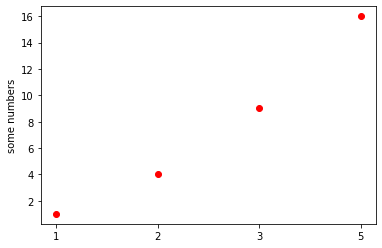

In [6]:
plt.plot(['1', '2', '3', '5'], [1, 4, 9, 16], 'ro')
plt.ylabel('some numbers')
plt.show()

In [41]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime

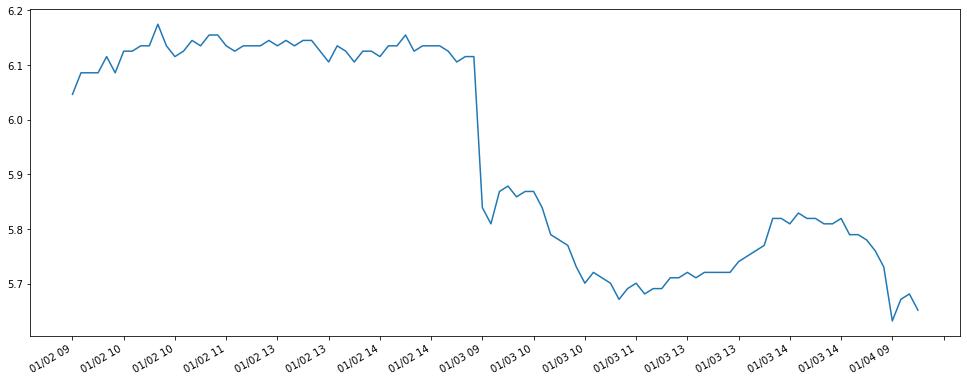

In [114]:
fig, ax = plt.subplots(figsize=(1200/72,480/72))

tm = dt_df.index[99]
ydata = dt_df.loc[:tm,'close'].values
xdata = np.arange(len(ydata))

# format the ticks
tmLabel = dt_df.loc[:tm,'close'].index
x_fmt = [x.strftime("%m/%d %H") for x in tmLabel]

def format_date(x,pos=None):   
    x = int(x)
    if x<0 or x>len(x_fmt)-1:
        return ''
    return x_fmt[x]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))


ax.plot(xdata,ydata)
fig.autofmt_xdate()
plt.show()

In [48]:
data = dt_df[100:200]
data_up = data.query('open <= close')
data_down = data.query('open > close')

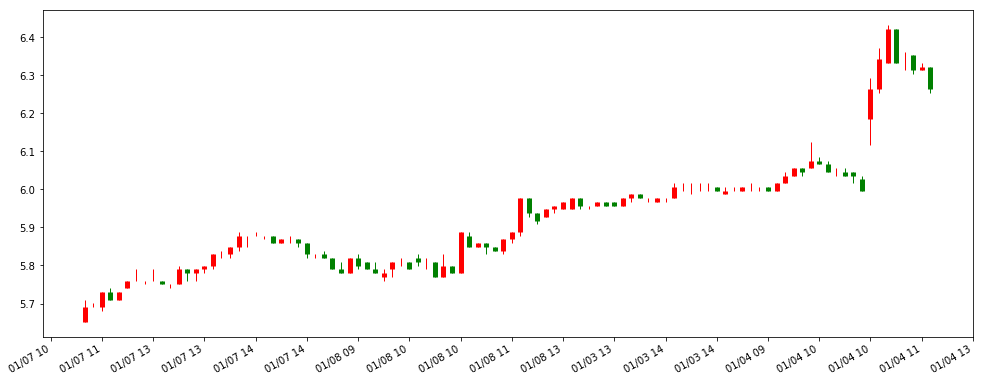

In [60]:
fig, ax = plt.subplots(figsize=(1200/72,480/72))

# format the ticks
tmLabel = dt_df[80:220].index
x_idx = dt_df[80:220].TmIdx.values.tolist()
x_fmt = [x.strftime("%m/%d %H") for x in tmLabel]

def format_date(x,pos=None):   
    x = int(x)
    if x<0:
        return ''
    else:
        x2 = x_idx.index(x) -x_idx[0]
    return x_fmt[x2]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))

x = data_up.TmIdx.values
ymin = data_up.open.values
ymax = data_up.close.values
ax.vlines(x, ymin, ymax, color='r', lw=5)
ax.vlines(x, data_up.low.values, data_up.high.values, color='r', lw=1)
x = data_down.TmIdx.values
ymin = data_down.close.values
ymax = data_down.open.values
ax.vlines(x, ymin, ymax, color='g', lw=5)
ax.vlines(x, data_down.low.values, data_down.high.values, color='g', lw=1)

#x = [d[0] for d in dd[:10]]
#y = [d[1] for d in dd[:10]]
#ax.plot(x, y, color='b')


fig.autofmt_xdate()
plt.show()

In [39]:
def candel_plotter(ax, data_df, i, w):
    data = data_df[i-w:i+w]
    data_up = data.query('open <= close')
    data_down = data.query('open > close')
    
    x = data_up.TmIdx.values
    ax.vlines(x, data_up.open.values, data_up.close.values, color='r', lw=5)
    ax.vlines(x, data_up.low.values, data_up.high.values, color='r', lw=1)
    x = data_down.TmIdx.values
    ax.vlines(x, data_down.close.values, data_down.open.values, color='g', lw=5)
    ax.vlines(x, data_down.low.values, data_down.high.values, color='g', lw=1)
    
    #out = ax.plot(data1, data2, **param_dict)
    return None

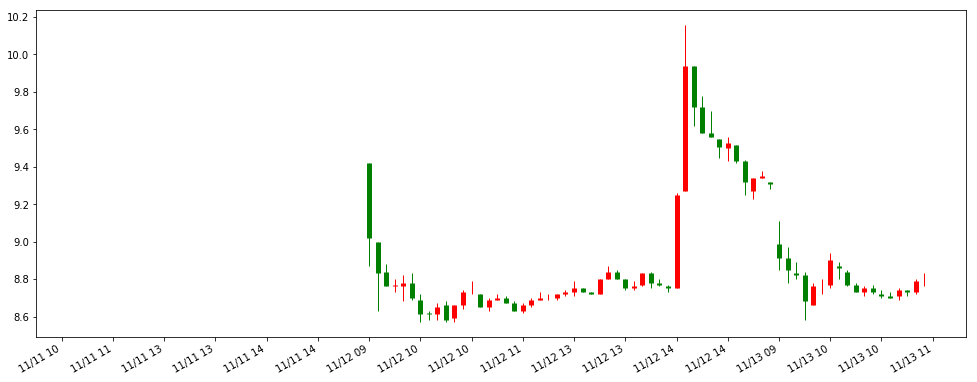

In [55]:
i, w = 10000,50
fig, ax = plt.subplots(1, 1,figsize=(1200/72,480/72))

# format the ticks
tmLabel = dt_df[i-w-int(w*0.3):i+w+int(w*0.3)].index
x_idx = dt_df[i-w-int(w*0.3):i+w+int(w*0.3)].TmIdx.values.tolist()
x_fmt = [x.strftime("%m/%d %H") for x in tmLabel]

def format_date(x,pos=None):   
    x = int(x)
    if x<0:
        return ''
    else:
        x2 = x_idx.index(x)
    return x_fmt[x2]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))


candel_plotter(ax, dt_df, i, w)
fig.autofmt_xdate()
plt.show()

In [47]:
x_fmt[18]

'11/08 09'

In [30]:
dt_df[500:501].index

DatetimeIndex(['2019-01-16 11:15:00'], dtype='datetime64[ns]', name='datetime', freq=None)

In [53]:
dt_df.loc['2019-11-8 13':'2019-11-11']

,close,total_turnover,open,volume,high,low,TmIdx
datetime,,,,,,,
2019-11-08 13:05:00,8.4917,298455.0,8.5216,34900.0,8.5316,8.4917,9912
2019-11-08 13:10:00,8.4917,100629.0,8.4917,11800.0,8.5117,8.4917,9913
2019-11-08 13:15:00,8.4519,235933.0,8.4917,27700.0,8.5017,8.4519,9914
2019-11-08 13:20:00,8.5017,140669.0,8.4718,16500.0,8.5017,8.4718,9915
2019-11-08 13:25:00,8.4718,142117.0,8.5017,16700.0,8.5017,8.4718,9916
2019-11-08 13:30:00,8.4718,61256.0,8.4718,7200.0,8.4818,8.4718,9917
2019-11-08 13:35:00,8.4618,158850.0,8.4718,18700.0,8.4718,8.4618,9918
2019-11-08 13:40:00,8.4519,95925.0,8.4618,11300.0,8.4618,8.4519,9919
2019-11-08 13:45:00,8.4419,221965.0,8.4519,26200.0,8.4519,8.4220,9920


In [55]:
#dt_df.loc[:'1/3/2020', 'close']
#dt_df.loc[:datetime(2020,1,3), 'close']

In [59]:
pd.core.index

<module 'pandas.core.index' from 'd:\\Users\\zhangyun29\\AppData\\Local\\Programs\\Python\\Python36-64\\lib\\site-packages\\pandas\\core\\index.py'>

In [38]:
def verify_end_to_end(lv_L):
    # peak with start
    dd = [[st1.start.TmIdx, st1.peak, st2.start] for st1,st2 in zip(lv_L[:-2], lv_L[1:]) if st1.peak.TmIdx != st2.start.TmIdx]
    if len(dd) == 0:
        return True
    else:
        return dd

In [27]:
def verity_valley_after_peak(lv_L):
    return True

In [39]:
verify_end_to_end(m.Lv1_L)

[[177.0, Point(192.0, 22.32, -1), Point(191.0, 22.26, 1)],
 [1668.0, Point(1679.0, 22.23, 1), Point(1676.0, 22.3, -1)],
 [1709.0, Point(1712.0, 21.74, -1), Point(1731.0, 21.68, -1)],
 [1946.0, Point(1949.0, 21.79, 1), Point(1968.0, 21.83, 1)],
 [1968.0, Point(1975.0, 21.85, 1), Point(1977.0, 21.95, -1)],
 [2464.0, Point(2504.0, 22.35, -1), Point(2491.0, 22.44, -1)],
 [2583.0, Point(2592.0, 22.15, -1), Point(2615.0, 22.15, -1)],
 [2792.0, Point(2803.0, 22.09, 1), Point(2851.0, 22.12, 1)],
 [2851.0, Point(2882.0, 22.18, -1), Point(2865.0, 22.26, -1)],
 [2865.0, Point(2873.0, 22.19, -1), Point(2884.0, 22.02, 1)],
 [3931.0, Point(3970.0, 22.71, 1), Point(3954.0, 22.63, 1)],
 [4589.0, Point(4594.0, 23.31, -1), Point(4596.0, 23.22, 1)],
 [5306.0, Point(5311.0, 24.3, 1), Point(5310.0, 24.34, -1)],
 [5364.0, Point(5373.0, 24.35, -1), Point(5371.0, 24.19, 1)],
 [5371.0, Point(5400.0, 24.39, -1), Point(5382.0, 24.44, -1)],
 [5382.0, Point(5393.0, 24.4, -1), Point(5399.0, 24.3, 1)],
 [5532.0, Poi

### Trend Analysis

In [ ]:
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx, 
      len(st.ES_stack), st.mp, st.mp[0]] for st in m.Lv1_L]

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS','start','drt', 'TmP', 'TmE', 'T', 'ES', 'mp', 'mp0']
df_out['A'] = -df_out.start.diff(-1)
df_out['st_cnt'] = -df_out.mp0.diff(-1)

In [ ]:
df_out.to_excel('data_csv\\lv1.xlsx')

In [ ]:
df_out.A.abs().quantile([.1, .15, .25,.5, .75,.85,.9])

In [ ]:
df_out.A.abs().mean()

In [ ]:
ss = df_out['A'].tolist()
ss.append(np.nan)
ss.append(np.nan)
df_out.loc[:,'A_next2'] = ss[2:]
df_out.loc[:,'A_next'] = ss[1:-1]

In [ ]:
df_out.head()

In [ ]:
df_out.loc[df_out['A']>0.5, [ 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.loc[df_out['A']>0.7, ['A_next', 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6').A_next2.quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6 and A > -A_next')

In [ ]:
df_out.loc[df_out['A']>0.3, [ 'A_next','A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

### 快照

In [36]:
tmIdx = 15929


In [33]:
# find Lv
def find_lv(tmIdx, level):
    global m
    lv_idx = [st.start.TmIdx for st in m.findList('st', level)]
    lv = m.findList('st', level)
    
    i = 0
    for tm in lv_idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i,lv[i]

In [37]:
find_lv(tmIdx,0), find_lv(tmIdx, 1),find_lv(tmIdx, 2)

((1904, Stick(drt:1, lv:0, Point(15927.0, 33.11, 1))),
 (392, Trend1(1, 2, Point(15927.0, 33.11, 1))),
 (86, Trend2(1, 2, Point(15927.0, 33.11, 1))))

In [35]:
# find Pair
def find_pair(tmIdx, level):
    global m
    idx = [p.TmS for p in m.findList('pair', level)]
    ll = m.findList('pair', level)
    
    i = 0
    for tm in idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i, ll[i]

In [ ]:
find_pair(tmIdx, 1).__dict__

In [ ]:
lv[0].__dict__

In [ ]:
m.Lv0_L[7]

In [ ]:
m.Lv1_L[3]

In [ ]:
m.Lv1_L[292].peak,m.Lv1_L[292],m.Lv1_L[292].end

In [ ]:
m.Lv0_L[3].__dict__

In [ ]:
len(m.PLv1_L)

In [ ]:
len(m.position)

In [ ]:
dd = [[op.drt,op.TmSig, op.TmOp, op.openV,op.pattern, op.pattern_objs] for op in m.position]

In [ ]:
df = pd.DataFrame(dd)

df.to_excel('position.xlsx')

In [ ]:
m.PCLv0_L[0].cL

In [ ]:
# print Pair list
dd = m.PLv1_L[1].calFeatures()
dd['TmS'] = []
dd['chain_layer'] = []
dd['index'] = []
dd['S'] =[]
dd['P'] = []
for k in dd.keys():
    dd[k] = []
for p in m.PLv1_L:
    print(p)
    r = p.calFeatures()
    r['TmS'] = p.TmS
    r['chain_layer'] = p.chain_layer
    r['index'] = p.index
    r['S'] = p.S
    r['P'] = p.P
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df = df[['TmS','chain_layer',  'index', 'drt','is_flag','cl', 'ch', 'a','k','c_c_level', 'c_drt'
         ,'S', 'P',  'b_tm', 'b_w', 'c_a',  'cc',
        'p_v', 's_tm', 's_v']]
df.to_excel('PairLv1.xlsx')

In [ ]:
[p.index for p in m.PLv1_L]

In [ ]:
[st.distr() for st in m.Lv1_L[5].stick_stack]

In [ ]:
m.Lv1_L[1].stick_stack[0]

In [ ]:
m.Lv1_L[1].stick_stack[0].peak

In [ ]:
m.Lv1_L[1].stick_stack[0].distr()

In [ ]:
l = [[st.drt,st.amp()[0], st.amp()[1]] for st in m.Lv1_L]
df = pd.DataFrame(l)
df.to_excel('00lv_amp_by_st.xlsx')

In [ ]:
tt = [list(st.distr()[0]) + list(st.distr()[1]) for st in m.Lv0_L[132:135]]
tt_df = pd.DataFrame(tt)
tt_df.to_excel('stdistr.xlsx')

In [ ]:
x = m.PLv0_L[15].calFeatures()
op = Operator(x,3,'pair_drt')
op2 = Operator(x,0.5,'concentrated')
r = Node([op,op2],1)
r.do()

In [ ]:
EventFactory.event_config

In [ ]:
m.findList('pair',0).__name__

In [ ]:
d = {'level_num':0, 'obj_name': 'Stick', 'event_name':'NEW', 'obj_p':'m.position[0]', 'method':'check_event', 'param':''}
EventFactory.reg_event(d)

In [ ]:
EventFactory.remove_event(d)

In [ ]:
# print Pair Lv0
dd = m.PLv0_L[5].output()
for k in dd.keys():
    dd[k] = []
for p in m.PLv0_L:
    r = p.output()
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df.to_excel('pair0.xlsx')

In [ ]:
# 把Lv0打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V] for st in m.Lv0_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv0_L.xlsx')

In [ ]:
# 把Lv1打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv1_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv1_L.xlsx')

In [ ]:
# 把Lv2打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv2_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv2_L.xlsx')

In [ ]:
st = m.Lv0_L[3]
k_L = [[k[1],k[2]] for k in dt if k[4]>= st.start.TmIdx and k[4]<= st.peak.TmIdx]

interval = (st.peak.V - st.start.V)*st.drt/ 20
L = min(st.peak.V, st.start.V)
H = max(st.peak.V, st.start.V)
scale = [L]
for i in list(range(1,20)):
    scale.append(scale[i-1]+interval)
scale.append(H)

distr = np.zeros(20)
for k in k_L:
    distr_k = np.zeros(20)
    for i in list(range(20)):
        if (min(k) <= scale[i] <= max(k)) or (min(k) <= scale[i+1] <= max(k)):
            distr_k[i] = 1
    cnt = distr_k.sum()
    distr_k = distr_k/cnt
    distr = distr + distr_k
distr, distr.argmax()

In [ ]:
ll = np.zeros(20)
ll[2:4] = 1
cnt = ll.sum()
ll = ll/cnt

ll2 = np.ones(20)
lr = ll +ll2
lr

In [ ]:
a = [1,2,3]
a[:-1]

### draw and verified

In [ ]:
data = {
    'times': x['TmIdx'],
    'data': 
}

In [94]:
# 绘图用插值函数
# input: 
#       1 - TmIdx array 
#       2 - Values array
# output: 按x轴查完值的value array
def interpoint(TmIdx_array, V_array):
    global x
    x['TmIdx'].astype('int64')
    print(len(x))
    df_tmp = pd.DataFrame({'V': V_array, 'TmIdx': TmIdx_array})
    df_tmp['TmIdx'].astype('int64')
    start_tm = int(TmIdx_array[0])
    end_tm = int(TmIdx_array[-1]) +1
    df_tmp = df_tmp.merge(x.iloc[start_tm:end_tm,:], how='right', left_on='TmIdx', right_on='TmIdx')
    df_tmp.sort_values(['TmIdx'], inplace=True)
    df_tmp['V'].interpolate(inplace=True)
    return df_tmp['V'].values.tolist(), df_tmp[['TmIdx','V']]

In [ ]:
def draw(lv_list):
    global dt, interpoint
    x_idx = [k[4] for k in dt]
    oringe_dt = [[k[0], k[3], k[2], k[1]] for k in dt]

    n = len(lv_list)
    drawing_line = []
    
    for i in list(range(n)):
        tm, v = [], []
        for stick in lv_list[i]:
            tm.append(stick.start.TmIdx)
            v.append(stick.start.V)
        dt_line = interpoint(tm,v)
        line = Line('stick')
        line.add('xxx', [k[4] for k in dt], dt_line
        ,is_datazoom_show=True
        )  
        drawing_line.append(line)
        
    overlap = Overlap()
    for line in drawing_line:
        overlap.add(line)
    
    return overlap
            

In [ ]:
draw([Stick.lv_L, TrendLv1.lv_L, TrendLv2.lv_L])

### 定点k-line

In [31]:
def draw_k(center_point, half_window, stock_name='xxx'):
    line = Kline('stick')
    global dt, x
    
    dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()
    dt_tmp = [dd[:4] for dd in dt[center_point - half_window//2:center_point + half_window//2 ]]
    dt_line = [[k[0], k[3], k[2], k[1]] for k in dt_tmp]
    line.add(stock_name, dt_x, dt_line)  
    return line


In [32]:
draw_k(15027,500)

AttributeError: 'str' object has no attribute 'get'

In [ ]:
line = (Line()
       .add_yaxis()
       )

In [102]:
_,p_df = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

17124


### draw Pair

In [105]:
p = find_pair(tmIdx,0)[1]
p.__dict__

{'P': 33.61,
 'S': 33.11,
 'TmS': 15927.0,
 'cc': 0.55,
 'ccHL': (7, 18, 33.28499999999999, 33.559999999999974),
 'chain_layer': 2,
 'core': 33.50999999999998,
 'core_index': 16,
 'drt': 1,
 'his': [[33.11,
   33.135,
   33.16,
   33.184999999999995,
   33.209999999999994,
   33.23499999999999,
   33.25999999999999,
   33.28499999999999,
   33.30999999999999,
   33.33499999999999,
   33.359999999999985,
   33.384999999999984,
   33.40999999999998,
   33.43499999999998,
   33.45999999999998,
   33.48499999999998,
   33.50999999999998,
   33.534999999999975,
   33.559999999999974,
   33.58499999999997,
   33.61],
  array([0.2       , 0.53333333, 0.53333333, 0.78333333, 0.45      ,
         0.25      , 0.45      , 0.2       , 0.2       , 0.2       ,
         0.84285714, 1.04285714, 0.54285714, 0.34285714, 0.25396825,
         0.97619048, 1.33730159, 0.69444444, 0.69444444, 0.47222222])],
 'index': [1904, 1905],
 'status': 1}

In [186]:
level = 1
center_point = tmIdx
half_window = 15
start = int(center_point - half_window)
end = int(center_point + half_window)
dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()

In [187]:
point1 = m.findList('st',level-1)[p.index[0]].start
point1

Point(15927.0, 33.11, 1)

In [188]:
point2 = m.findList('st',level-1)[p.index[-1]].peak
point2

Point(15936.0, 33.36, 1)

In [189]:
_,df_p = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

17124


In [190]:
df_draw = x.iloc[start:end,].copy()
df_draw = df_draw.merge(df_p, how='left', left_on='TmIdx', right_on='TmIdx')
df_draw = df_draw.merge(dt_df[['open','high','low','close','TmIdx']], how='left', left_on='TmIdx', right_on='TmIdx')
df_draw.query('TmIdx>15900 and TmIdx<15940')

,datetime,TmIdx,date_str,internal,mark,V,open,high,low,close
0,2020-02-12 10:45:00,15914,02-12 10:45,60.0,NaN,NaN,33.19,33.19,32.85,32.91
1,2020-02-12 10:46:00,15915,02-12 10:46,60.0,NaN,NaN,32.86,33.05,32.82,33.05
2,2020-02-12 10:47:00,15916,02-12 10:47,60.0,NaN,NaN,33.02,33.13,33.02,33.09
3,2020-02-12 10:48:00,15917,02-12 10:48,60.0,NaN,NaN,33.10,33.12,33.07,33.09
4,2020-02-12 10:49:00,15918,02-12 10:49,60.0,NaN,NaN,33.10,33.20,33.06,33.19
5,2020-02-12 10:50:00,15919,02-12 10:50,60.0,NaN,NaN,33.14,33.28,33.10,33.27
6,2020-02-12 10:51:00,15920,02-12 10:51,60.0,NaN,NaN,33.21,33.29,33.20,33.28
7,2020-02-12 10:52:00,15921,02-12 10:52,60.0,NaN,NaN,33.28,33.33,33.21,33.33
8,2020-02-12 10:53:00,15922,02-12 10:53,60.0,NaN,NaN,33.31,33.37,33.23,33.27
9,2020-02-12 10:54:00,15923,02-12 10:54,60.0,NaN,NaN,33.25,33.36,33.23,33.25


In [191]:
df_p

,TmIdx,V
0,15927,33.110000
2,15928,33.137778
3,15929,33.165556
4,15930,33.193333
5,15931,33.221111
6,15932,33.248889
7,15933,33.276667
8,15934,33.304444
9,15935,33.332222
1,15936,33.360000


In [193]:
df_draw.fillna('', inplace=True)
df_draw

,datetime,TmIdx,date_str,internal,mark,V,open,high,low,close
0,2020-02-12 10:45:00,15914,02-12 10:45,60.0,,,33.19,33.19,32.85,32.91
1,2020-02-12 10:46:00,15915,02-12 10:46,60.0,,,32.86,33.05,32.82,33.05
2,2020-02-12 10:47:00,15916,02-12 10:47,60.0,,,33.02,33.13,33.02,33.09
3,2020-02-12 10:48:00,15917,02-12 10:48,60.0,,,33.10,33.12,33.07,33.09
4,2020-02-12 10:49:00,15918,02-12 10:49,60.0,,,33.10,33.20,33.06,33.19
5,2020-02-12 10:50:00,15919,02-12 10:50,60.0,,,33.14,33.28,33.10,33.27
6,2020-02-12 10:51:00,15920,02-12 10:51,60.0,,,33.21,33.29,33.20,33.28
7,2020-02-12 10:52:00,15921,02-12 10:52,60.0,,,33.28,33.33,33.21,33.33
8,2020-02-12 10:53:00,15922,02-12 10:53,60.0,,,33.31,33.37,33.23,33.27
9,2020-02-12 10:54:00,15923,02-12 10:54,60.0,,,33.25,33.36,33.23,33.25


In [201]:
import pyecharts.options as opts
COLOR = ['red', 'yellow', 'green']

In [198]:
kl = (Kline()
      .add_xaxis(df_draw.date_str.tolist())
      .add_yaxis('pair', df_draw[['open','close','low','high']].values.tolist())
)
kl.render_notebook()

In [199]:
l = (
    Line()
    .add_xaxis(df_draw.date_str.tolist())
    .add_yaxis("pair"
               , df_draw.V.tolist()
               ,is_symbol_show = False
               .linestyle_opts = opts.LineStyleOpts(color=color[level], width=4, opacity=0.6)
               
              )
)
l.render_notebook()

In [200]:
kl.overlap(l).render_notebook()

In [ ]:
find_pair(14952,1)[1].__dict__

In [ ]:
draw_k(16027,500)

In [ ]:
x.loc[x['TmIdx']==14705,'datetime']

In [ ]:
x.loc[x['datetime']=='2020-02-06 14:00','TmIdx']

### draw scene

In [ ]:
m.Lv0_L[0]

In [ ]:
m.Lv1_L[2]

In [ ]:
m.findList('st', 0)[2]

In [ ]:
Lv2_idx = [st.start.TmIdx for st in m.Lv2_L]

In [ ]:
Lv2_idx = []
Lv2_idx = [st.start.TmIdx for st in m.findList('st', 2)]

In [ ]:
Lv2_idx[:10]

In [ ]:
def find_index(ll, num):
    i = 0
    for n in ll[1:]:
        if num >= n:
            i += 1
        else:
            break
    return i

        
Lv2_idx.index(440)

In [ ]:
idx = find_index(Lv2_idx, 9508)

In [ ]:
m.Lv2_L[idx].drt, m.Lv2_L[idx].start, m.Lv2_L[idx+1].start

In [ ]:
idx

In [ ]:
len(m.Lv2_L)

In [ ]:
i =0
for st in m.Lv2_L:
    print(i, st.start,st.pp)
    i += 1

In [ ]:
m.Lv2_L[66].stick_stack, m.Lv2_L[66].mp

In [ ]:
m.Lv2_L[67].stick_stack, m.Lv2_L[67].mp, m.Lv2_L[67].status

In [ ]:
CenterStrict(Stick.lv_L[1:], market)

In [ ]:
for c in market.CenterStrict_LD[10]:
    print(c)

In [ ]:
a = [1,2,3,4,9]
l = [1,2,3,4,9]
for aa,ll in zip(*[a,l]):
    print(aa,ll)

In [ ]:
m.__class__.__name__

In [ ]:
a = []
a.append([])
a.append([])
a.append([])

In [ ]:
a

In [ ]:
tmp = type('Xb', (object,), dict(a=1))
tmp = type('Xa', (object,), dict(a=1))

In [ ]:
a = [1,2,3]
b = [3,4,5]
for aa in a [1:
             :-1]:
    print(aa)

In [ ]:
d1 = {'a': 1}
d2 = {'b': 2}

In [ ]:
d1.append(d2)